# Scatterplot RNA-seq vs PRO-seq per species

In [1]:
suppressMessages(library(DESeq2))
suppressMessages(library(ggplot2))
suppressMessages(library(ggrepel))
suppressMessages(library(viridis))
suppressMessages(library(tidyr))
suppressMessages(library(ggplot2))
suppressMessages(library(dplyr))
suppressMessages(library(gridExtra))
suppressMessages(library(grid))
suppressMessages(library(cowplot))
suppressMessages(library(fgsea))
suppressMessages(library(scales))
suppressMessages(library(reshape2))
suppressMessages(library(pheatmap))
suppressMessages(library(data.table))

In [2]:
start.time <- Sys.time()

# Loads gene counts for all libraries

baseDir <- "/scratch/Users/dara6367/RNA-seq_interspecies-nutlin/"
countsDir <- paste0(baseDir,"featureCounts/")
tableDir <- paste0(baseDir,"misc/")

##########################################################
                         # Human
##########################################################

baseDir <- "/scratch/Users/dara6367/RNA-seq_interspecies-nutlin/"
countsDir <- paste0(baseDir,"featureCounts/")
tableDir <- paste0(baseDir,"misc/")

# Reads in count data and their conditions table.
load(paste0(countsDir, "RNA-Nutlin-Human.standard10.featureCounts.RData"))
counts_RNA_Human <- counts$counts
conditionsTableFileRNA <- paste0(tableDir, "conditionsTable.RNA-Nutlin-Human.csv")
conditionsTableRNA <- read.csv(conditionsTableFileRNA, header = TRUE)
load(paste0(countsDir, "PRO-Nutlin-Human.standard10.without5prime25.featureCounts.RData"))
counts_PRO_Human <- counts$counts
conditionsTableFilePRO <- paste0(tableDir, "conditionsTable.PRO-Nutlin-Human.csv")
conditionsTablePRO <- read.csv(conditionsTableFilePRO, header = TRUE)

# Assigns the same ID to both the conditionTables row names and the counts column names.
colnames(counts_RNA_Human) <- conditionsTableRNA$sample
rownames(conditionsTableRNA) <- conditionsTableRNA$sample
colnames(counts_PRO_Human) <- conditionsTablePRO$sample
rownames(conditionsTablePRO) <- conditionsTablePRO$sample

# Starts creating a data frame that will contain all species counts.
counts_RNA_all <- counts_RNA_Human
counts_PRO_all <- counts_PRO_Human

# Starts creating a data frame that will contain all species conditionTable info.
conditionsTable_all_RNA <- conditionsTableRNA
conditionsTable_all_PRO <- conditionsTablePRO

##########################################################
                         # Chimp
##########################################################

baseDir <- "/scratch/Users/dara6367/RNA-seq_interspecies-nutlin/"
countsDir <- paste0(baseDir,"featureCounts/")
tableDir <- paste0(baseDir,"misc/")

# Reads in count data and their conditions table.
load(paste0(countsDir, "RNA-Nutlin-Chimp.standard10.featureCounts.RData"))
counts_RNA_Chimp <- counts$counts
conditionsTableFileRNA <- paste0(tableDir, "conditionsTable.RNA-Nutlin-Chimp.csv")
conditionsTableRNA <- read.csv(conditionsTableFileRNA, header = TRUE)
load(paste0(countsDir, "PRO-Nutlin-Chimp.standard10.without5prime25.featureCounts.RData"))
counts_PRO_Chimp <- counts$counts
conditionsTableFilePRO <- paste0(tableDir, "conditionsTable.PRO-Nutlin-Chimp.csv")
conditionsTablePRO <- read.csv(conditionsTableFilePRO, header = TRUE)

# Assigns the same ID to both the conditionTables row names and the counts column names.
colnames(counts_RNA_Chimp) <- conditionsTableRNA$sample
rownames(conditionsTableRNA) <- conditionsTableRNA$sample
colnames(counts_PRO_Chimp) <- conditionsTablePRO$sample
rownames(conditionsTablePRO) <- conditionsTablePRO$sample

# Creates a temporary data frame containing Chimp counts along with NA with missing genes.
newDF_RNA <- data.frame(matrix(nrow = dim(counts_RNA_Human)[1], ncol = dim(counts_RNA_Human)[2]))
colnames(newDF_RNA) <- colnames(counts_RNA_Chimp)
rownames(newDF_RNA) <- rownames(counts_RNA_Human)
for(gene in rownames(counts_RNA_Chimp)) {
    newDF_RNA[rownames(newDF_RNA) == gene, ] <- counts_RNA_Chimp[rownames(counts_RNA_Chimp) == gene, ] }
newDF_PRO <- data.frame(matrix(nrow = dim(counts_PRO_Human)[1], ncol = dim(counts_PRO_Human)[2]))
colnames(newDF_PRO) <- colnames(counts_PRO_Chimp)
rownames(newDF_PRO) <- rownames(counts_PRO_Human)
for(gene in rownames(counts_PRO_Chimp)) {
    newDF_PRO[rownames(newDF_PRO) == gene, ] <- counts_PRO_Chimp[rownames(counts_PRO_Chimp) == gene, ] }

# Merges the Chimp counts to the bigger all-species counts data frame.
counts_RNA_all <- cbind(counts_RNA_all, newDF_RNA)
counts_PRO_all <- cbind(counts_PRO_all, newDF_PRO)

# Merges the Chimp conditionsTableRNA to the bigger all-species conditionsTableRNA data frame.
conditionsTable_all_RNA <- rbind(conditionsTable_all_RNA, conditionsTableRNA)
conditionsTable_all_PRO <- rbind(conditionsTable_all_PRO, conditionsTablePRO)

##########################################################
                         # Bonobo
##########################################################

baseDir <- "/scratch/Users/dara6367/RNA-seq_interspecies-nutlin/"
countsDir <- paste0(baseDir,"featureCounts/")
tableDir <- paste0(baseDir,"misc/")

# Reads in count data and their conditions table.
load(paste0(countsDir, "RNA-Nutlin-Bonobo.standard10.featureCounts.RData"))
counts_RNA_Bonobo <- counts$counts
conditionsTableFileRNA <- paste0(tableDir, "conditionsTable.RNA-Nutlin-Bonobo.csv")
conditionsTableRNA <- read.csv(conditionsTableFileRNA, header = TRUE)
load(paste0(countsDir, "PRO-Nutlin-Bonobo.standard10.without5prime25.featureCounts.RData"))
counts_PRO_Bonobo <- counts$counts
conditionsTableFilePRO <- paste0(tableDir, "conditionsTable.PRO-Nutlin-Bonobo.csv")
conditionsTablePRO <- read.csv(conditionsTableFilePRO, header = TRUE)

# Assigns the same ID to both the conditionTables row names and the counts column names.
colnames(counts_RNA_Bonobo) <- conditionsTableRNA$sample
rownames(conditionsTableRNA) <- conditionsTableRNA$sample
colnames(counts_PRO_Bonobo) <- conditionsTablePRO$sample
rownames(conditionsTablePRO) <- conditionsTablePRO$sample

# Creates a temporary data frame containing Bonobo counts along with NA with missing genes.
newDF_RNA <- data.frame(matrix(nrow = dim(counts_RNA_Human)[1], ncol = dim(counts_RNA_Human)[2]))
colnames(newDF_RNA) <- colnames(counts_RNA_Bonobo)
rownames(newDF_RNA) <- rownames(counts_RNA_Human)
for(gene in rownames(counts_RNA_Bonobo)) {
    newDF_RNA[rownames(newDF_RNA) == gene, ] <- counts_RNA_Bonobo[rownames(counts_RNA_Bonobo) == gene, ] }
newDF_PRO <- data.frame(matrix(nrow = dim(counts_PRO_Human)[1], ncol = dim(counts_PRO_Human)[2]))
colnames(newDF_PRO) <- colnames(counts_PRO_Bonobo)
rownames(newDF_PRO) <- rownames(counts_PRO_Human)
for(gene in rownames(counts_PRO_Bonobo)) {
    newDF_PRO[rownames(newDF_PRO) == gene, ] <- counts_PRO_Bonobo[rownames(counts_PRO_Bonobo) == gene, ] }

# Merges the Bonobo counts to the bigger all-species counts data frame.
counts_RNA_all <- cbind(counts_RNA_all, newDF_RNA)
counts_PRO_all <- cbind(counts_PRO_all, newDF_PRO)

# Merges the Bonobo conditionsTableRNA to the bigger all-species conditionsTableRNA data frame.
conditionsTable_all_RNA <- rbind(conditionsTable_all_RNA, conditionsTableRNA)
conditionsTable_all_PRO <- rbind(conditionsTable_all_PRO, conditionsTablePRO)

##########################################################
                         # Gorilla
##########################################################

baseDir <- "/scratch/Users/dara6367/RNA-seq_interspecies-nutlin/"
countsDir <- paste0(baseDir,"featureCounts/")
tableDir <- paste0(baseDir,"misc/")

# Reads in count data and their conditions table.
load(paste0(countsDir, "RNA-Nutlin-Gorilla.standard10.featureCounts.RData"))
counts_RNA_Gorilla <- counts$counts
conditionsTableFileRNA <- paste0(tableDir, "conditionsTable.RNA-Nutlin-Gorilla.csv")
conditionsTableRNA <- read.csv(conditionsTableFileRNA, header = TRUE)
load(paste0(countsDir, "PRO-Nutlin-Gorilla.standard10.without5prime25.featureCounts.RData"))
counts_PRO_Gorilla <- counts$counts
conditionsTableFilePRO <- paste0(tableDir, "conditionsTable.PRO-Nutlin-Gorilla.csv")
conditionsTablePRO <- read.csv(conditionsTableFilePRO, header = TRUE)

# Assigns the same ID to both the conditionTables row names and the counts column names.
colnames(counts_RNA_Gorilla) <- conditionsTableRNA$sample
rownames(conditionsTableRNA) <- conditionsTableRNA$sample
colnames(counts_PRO_Gorilla) <- conditionsTablePRO$sample
rownames(conditionsTablePRO) <- conditionsTablePRO$sample

# Creates a temporary data frame containing Gorilla counts along with NA with missing genes.
newDF_RNA <- data.frame(matrix(nrow = dim(counts_RNA_Human)[1], ncol = dim(counts_RNA_Human)[2]))
colnames(newDF_RNA) <- colnames(counts_RNA_Gorilla)
rownames(newDF_RNA) <- rownames(counts_RNA_Human)
for(gene in rownames(counts_RNA_Gorilla)) {
    newDF_RNA[rownames(newDF_RNA) == gene, ] <- counts_RNA_Gorilla[rownames(counts_RNA_Gorilla) == gene, ] }
newDF_PRO <- data.frame(matrix(nrow = dim(counts_PRO_Human)[1], ncol = dim(counts_PRO_Human)[2]))
colnames(newDF_PRO) <- colnames(counts_PRO_Gorilla)
rownames(newDF_PRO) <- rownames(counts_PRO_Human)
for(gene in rownames(counts_PRO_Gorilla)) {
    newDF_PRO[rownames(newDF_PRO) == gene, ] <- counts_PRO_Gorilla[rownames(counts_PRO_Gorilla) == gene, ] }

# Merges the Gorilla counts to the bigger all-species counts data frame.
counts_RNA_all <- cbind(counts_RNA_all, newDF_RNA)
counts_PRO_all <- cbind(counts_PRO_all, newDF_PRO)

# Merges the Gorilla conditionsTableRNA to the bigger all-species conditionsTableRNA data frame.
conditionsTable_all_RNA <- rbind(conditionsTable_all_RNA, conditionsTableRNA)
conditionsTable_all_PRO <- rbind(conditionsTable_all_PRO, conditionsTablePRO)

##########################################################
                        # Orangutan
##########################################################

baseDir <- "/scratch/Users/dara6367/RNA-seq_interspecies-nutlin/"
countsDir <- paste0(baseDir,"featureCounts/")
tableDir <- paste0(baseDir,"misc/")

# Reads in count data and their conditions table.
load(paste0(countsDir, "RNA-Nutlin-Orangutan.standard10.featureCounts.RData"))
counts_RNA_Orangutan <- counts$counts
conditionsTableFileRNA <- paste0(tableDir, "conditionsTable.RNA-Nutlin-Orangutan.csv")
conditionsTableRNA <- read.csv(conditionsTableFileRNA, header = TRUE)
load(paste0(countsDir, "PRO-Nutlin-Orangutan.standard10.without5prime25.featureCounts.RData"))
counts_PRO_Orangutan <- counts$counts
conditionsTableFilePRO <- paste0(tableDir, "conditionsTable.PRO-Nutlin-Orangutan.csv")
conditionsTablePRO <- read.csv(conditionsTableFilePRO, header = TRUE)

# Assigns the same ID to both the conditionTables row names and the counts column names.
colnames(counts_RNA_Orangutan) <- conditionsTableRNA$sample
rownames(conditionsTableRNA) <- conditionsTableRNA$sample
colnames(counts_PRO_Orangutan) <- conditionsTablePRO$sample
rownames(conditionsTablePRO) <- conditionsTablePRO$sample

# Creates a temporary data frame containing Orangutan counts along with NA with missing genes.
newDF_RNA <- data.frame(matrix(nrow = dim(counts_RNA_Human)[1], ncol = dim(counts_RNA_Human)[2]))
colnames(newDF_RNA) <- colnames(counts_RNA_Orangutan)
rownames(newDF_RNA) <- rownames(counts_RNA_Human)
for(gene in rownames(counts_RNA_Orangutan)) {
    newDF_RNA[rownames(newDF_RNA) == gene, ] <- counts_RNA_Orangutan[rownames(counts_RNA_Orangutan) == gene, ] }
newDF_PRO <- data.frame(matrix(nrow = dim(counts_PRO_Human)[1], ncol = dim(counts_PRO_Human)[2]))
colnames(newDF_PRO) <- colnames(counts_PRO_Orangutan)
rownames(newDF_PRO) <- rownames(counts_PRO_Human)
for(gene in rownames(counts_PRO_Orangutan)) {
    newDF_PRO[rownames(newDF_PRO) == gene, ] <- counts_PRO_Orangutan[rownames(counts_PRO_Orangutan) == gene, ] }

# Merges the Orangutan counts to the bigger all-species counts data frame.
counts_RNA_all <- cbind(counts_RNA_all, newDF_RNA)
counts_PRO_all <- cbind(counts_PRO_all, newDF_PRO)

# Merges the Orangutan conditionsTableRNA to the bigger all-species conditionsTableRNA data frame.
conditionsTable_all_RNA <- rbind(conditionsTable_all_RNA, conditionsTableRNA)
conditionsTable_all_PRO <- rbind(conditionsTable_all_PRO, conditionsTablePRO)

##########################################################
                         # Gibbon
##########################################################

baseDir <- "/scratch/Users/dara6367/RNA-seq_interspecies-nutlin/"
countsDir <- paste0(baseDir,"featureCounts/")
tableDir <- paste0(baseDir,"misc/")

# Reads in count data and their conditions table.
load(paste0(countsDir, "RNA-Nutlin-Gibbon.standard10.featureCounts.RData"))
counts_RNA_Gibbon <- counts$counts
conditionsTableFileRNA <- paste0(tableDir, "conditionsTable.RNA-Nutlin-Gibbon.csv")
conditionsTableRNA <- read.csv(conditionsTableFileRNA, header = TRUE)
load(paste0(countsDir, "PRO-Nutlin-Gibbon.standard10.without5prime25.featureCounts.RData"))
counts_PRO_Gibbon <- counts$counts
conditionsTableFilePRO <- paste0(tableDir, "conditionsTable.PRO-Nutlin-Gibbon.csv")
conditionsTablePRO <- read.csv(conditionsTableFilePRO, header = TRUE)

# Assigns the same ID to both the conditionTables row names and the counts column names.
colnames(counts_RNA_Gibbon) <- conditionsTableRNA$sample
rownames(conditionsTableRNA) <- conditionsTableRNA$sample
colnames(counts_PRO_Gibbon) <- conditionsTablePRO$sample
rownames(conditionsTablePRO) <- conditionsTablePRO$sample

# Creates a temporary data frame containing Gibbon counts along with NA with missing genes.
newDF_RNA <- data.frame(matrix(nrow = dim(counts_RNA_Human)[1], ncol = dim(counts_RNA_Human)[2]))
colnames(newDF_RNA) <- colnames(counts_RNA_Gibbon)
rownames(newDF_RNA) <- rownames(counts_RNA_Human)
for(gene in rownames(counts_RNA_Gibbon)) {
    newDF_RNA[rownames(newDF_RNA) == gene, ] <- counts_RNA_Gibbon[rownames(counts_RNA_Gibbon) == gene, ] }
newDF_PRO <- data.frame(matrix(nrow = dim(counts_PRO_Human)[1], ncol = dim(counts_PRO_Human)[2]))
colnames(newDF_PRO) <- colnames(counts_PRO_Gibbon)
rownames(newDF_PRO) <- rownames(counts_PRO_Human)
for(gene in rownames(counts_PRO_Gibbon)) {
    newDF_PRO[rownames(newDF_PRO) == gene, ] <- counts_PRO_Gibbon[rownames(counts_PRO_Gibbon) == gene, ] }

# Merges the Gibbon counts to the bigger all-species counts data frame.
counts_RNA_all <- cbind(counts_RNA_all, newDF_RNA)
counts_PRO_all <- cbind(counts_PRO_all, newDF_PRO)

# Merges the Gibbon conditionsTableRNA to the bigger all-species conditionsTableRNA data frame.
conditionsTable_all_RNA <- rbind(conditionsTable_all_RNA, conditionsTableRNA)
conditionsTable_all_PRO <- rbind(conditionsTable_all_PRO, conditionsTablePRO)

##########################################################
                         # Rhesus
##########################################################

baseDir <- "/scratch/Users/dara6367/RNA-seq_interspecies-nutlin/"
countsDir <- paste0(baseDir,"featureCounts/")
tableDir <- paste0(baseDir,"misc/")

# Reads in count data and their conditions table.
load(paste0(countsDir, "RNA-Nutlin-Rhesus.standard10.featureCounts.RData"))
counts_RNA_Rhesus <- counts$counts
conditionsTableFileRNA <- paste0(tableDir, "conditionsTable.RNA-Nutlin-Rhesus.csv")
conditionsTableRNA <- read.csv(conditionsTableFileRNA, header = TRUE)
load(paste0(countsDir, "PRO-Nutlin-Rhesus.standard10.without5prime25.featureCounts.RData"))
counts_PRO_Rhesus <- counts$counts
conditionsTableFilePRO <- paste0(tableDir, "conditionsTable.PRO-Nutlin-Rhesus.csv")
conditionsTablePRO <- read.csv(conditionsTableFilePRO, header = TRUE)

# Assigns the same ID to both the conditionTables row names and the counts column names.
colnames(counts_RNA_Rhesus) <- conditionsTableRNA$sample
rownames(conditionsTableRNA) <- conditionsTableRNA$sample
colnames(counts_PRO_Rhesus) <- conditionsTablePRO$sample
rownames(conditionsTablePRO) <- conditionsTablePRO$sample

# Creates a temporary data frame containing Rhesus counts along with NA with missing genes.
newDF_RNA <- data.frame(matrix(nrow = dim(counts_RNA_Human)[1], ncol = dim(counts_RNA_Human)[2]))
colnames(newDF_RNA) <- colnames(counts_RNA_Rhesus)
rownames(newDF_RNA) <- rownames(counts_RNA_Human)
for(gene in rownames(counts_RNA_Rhesus)) {
    newDF_RNA[rownames(newDF_RNA) == gene, ] <- counts_RNA_Rhesus[rownames(counts_RNA_Rhesus) == gene, ] }
newDF_PRO <- data.frame(matrix(nrow = dim(counts_PRO_Human)[1], ncol = dim(counts_PRO_Human)[2]))
colnames(newDF_PRO) <- colnames(counts_PRO_Rhesus)
rownames(newDF_PRO) <- rownames(counts_PRO_Human)
for(gene in rownames(counts_PRO_Rhesus)) {
    newDF_PRO[rownames(newDF_PRO) == gene, ] <- counts_PRO_Rhesus[rownames(counts_PRO_Rhesus) == gene, ] }

# Merges the Rhesus counts to the bigger all-species counts data frame.
counts_RNA_all <- cbind(counts_RNA_all, newDF_RNA)
counts_PRO_all <- cbind(counts_PRO_all, newDF_PRO)

# Merges the Rhesus conditionsTableRNA to the bigger all-species conditionsTableRNA data frame.
conditionsTable_all_RNA <- rbind(conditionsTable_all_RNA, conditionsTableRNA)
conditionsTable_all_PRO <- rbind(conditionsTable_all_PRO, conditionsTablePRO)

##########################################################
                         # Baboon
##########################################################

baseDir <- "/scratch/Users/dara6367/RNA-seq_interspecies-nutlin/"
countsDir <- paste0(baseDir,"featureCounts/")
tableDir <- paste0(baseDir,"misc/")

# Reads in count data and their conditions table.
load(paste0(countsDir, "RNA-Nutlin-Baboon.standard10.featureCounts.RData"))
counts_RNA_Baboon <- counts$counts
conditionsTableFileRNA <- paste0(tableDir, "conditionsTable.RNA-Nutlin-Baboon.csv")
conditionsTableRNA <- read.csv(conditionsTableFileRNA, header = TRUE)
load(paste0(countsDir, "PRO-Nutlin-Baboon.standard10.without5prime25.featureCounts.RData"))
counts_PRO_Baboon <- counts$counts
conditionsTableFilePRO <- paste0(tableDir, "conditionsTable.PRO-Nutlin-Baboon.csv")
conditionsTablePRO <- read.csv(conditionsTableFilePRO, header = TRUE)

# Assigns the same ID to both the conditionTables row names and the counts column names.
colnames(counts_RNA_Baboon) <- conditionsTableRNA$sample
rownames(conditionsTableRNA) <- conditionsTableRNA$sample
colnames(counts_PRO_Baboon) <- conditionsTablePRO$sample
rownames(conditionsTablePRO) <- conditionsTablePRO$sample

# Creates a temporary data frame containing Baboon counts along with NA with missing genes.
newDF_RNA <- data.frame(matrix(nrow = dim(counts_RNA_Human)[1], ncol = dim(counts_RNA_Human)[2]))
colnames(newDF_RNA) <- colnames(counts_RNA_Baboon)
rownames(newDF_RNA) <- rownames(counts_RNA_Human)
for(gene in rownames(counts_RNA_Baboon)) {
    newDF_RNA[rownames(newDF_RNA) == gene, ] <- counts_RNA_Baboon[rownames(counts_RNA_Baboon) == gene, ] }
newDF_PRO <- data.frame(matrix(nrow = dim(counts_PRO_Human)[1], ncol = dim(counts_PRO_Human)[2]))
colnames(newDF_PRO) <- colnames(counts_PRO_Baboon)
rownames(newDF_PRO) <- rownames(counts_PRO_Human)
for(gene in rownames(counts_PRO_Baboon)) {
    newDF_PRO[rownames(newDF_PRO) == gene, ] <- counts_PRO_Baboon[rownames(counts_PRO_Baboon) == gene, ] }

# Merges the Baboon counts to the bigger all-species counts data frame.
counts_RNA_all <- cbind(counts_RNA_all, newDF_RNA)
counts_PRO_all <- cbind(counts_PRO_all, newDF_PRO)

# Merges the Baboon conditionsTableRNA to the bigger all-species conditionsTableRNA data frame.
conditionsTable_all_RNA <- rbind(conditionsTable_all_RNA, conditionsTableRNA)
conditionsTable_all_PRO <- rbind(conditionsTable_all_PRO, conditionsTablePRO)

##########################################################
                    # SquirrelMonkey
##########################################################

baseDir <- "/scratch/Users/dara6367/RNA-seq_interspecies-nutlin/"
countsDir <- paste0(baseDir,"featureCounts/")
tableDir <- paste0(baseDir,"misc/")

# Reads in count data and their conditions table.
load(paste0(countsDir, "RNA-Nutlin-SquirrelMonkey.standard10.featureCounts.RData"))
counts_RNA_SquirrelMonkey <- counts$counts
conditionsTableFileRNA <- paste0(tableDir, "conditionsTable.RNA-Nutlin-SquirrelMonkey.csv")
conditionsTableRNA <- read.csv(conditionsTableFileRNA, header = TRUE)
load(paste0(countsDir, "PRO-Nutlin-SquirrelMonkey.standard10.without5prime25.featureCounts.RData"))
counts_PRO_SquirrelMonkey <- counts$counts
conditionsTableFilePRO <- paste0(tableDir, "conditionsTable.PRO-Nutlin-SquirrelMonkey.csv")
conditionsTablePRO <- read.csv(conditionsTableFilePRO, header = TRUE)

# Assigns the same ID to both the conditionTables row names and the counts column names.
colnames(counts_RNA_SquirrelMonkey) <- conditionsTableRNA$sample
rownames(conditionsTableRNA) <- conditionsTableRNA$sample
colnames(counts_PRO_SquirrelMonkey) <- conditionsTablePRO$sample
rownames(conditionsTablePRO) <- conditionsTablePRO$sample

# Creates a temporary data frame containing SquirrelMonkey counts along with NA with missing genes.
newDF_RNA <- data.frame(matrix(nrow = dim(counts_RNA_Human)[1], ncol = dim(counts_RNA_Human)[2]))
colnames(newDF_RNA) <- colnames(counts_RNA_SquirrelMonkey)
rownames(newDF_RNA) <- rownames(counts_RNA_Human)
for(gene in rownames(counts_RNA_SquirrelMonkey)) {
    newDF_RNA[rownames(newDF_RNA) == gene, ] <- counts_RNA_SquirrelMonkey[rownames(counts_RNA_SquirrelMonkey) == gene, ] }
newDF_PRO <- data.frame(matrix(nrow = dim(counts_PRO_Human)[1], ncol = dim(counts_PRO_Human)[2]))
colnames(newDF_PRO) <- colnames(counts_PRO_SquirrelMonkey)
rownames(newDF_PRO) <- rownames(counts_PRO_Human)
for(gene in rownames(counts_PRO_SquirrelMonkey)) {
    newDF_PRO[rownames(newDF_PRO) == gene, ] <- counts_PRO_SquirrelMonkey[rownames(counts_PRO_SquirrelMonkey) == gene, ] }

# Merges the SquirrelMonkey counts to the bigger all-species counts data frame.
counts_RNA_all <- cbind(counts_RNA_all, newDF_RNA)
counts_PRO_all <- cbind(counts_PRO_all, newDF_PRO)

# Merges the SquirrelMonkey conditionsTableRNA to the bigger all-species conditionsTableRNA data frame.
conditionsTable_all_RNA <- rbind(conditionsTable_all_RNA, conditionsTableRNA)
conditionsTable_all_PRO <- rbind(conditionsTable_all_PRO, conditionsTablePRO)

##########################################################
                      # OwlMonkey
##########################################################

baseDir <- "/scratch/Users/dara6367/RNA-seq_interspecies-nutlin/"
countsDir <- paste0(baseDir,"featureCounts/")
tableDir <- paste0(baseDir,"misc/")

# Reads in count data and their conditions table.
load(paste0(countsDir, "RNA-Nutlin-OwlMonkey.standard10.featureCounts.RData"))
counts_RNA_OwlMonkey <- counts$counts
conditionsTableFileRNA <- paste0(tableDir, "conditionsTable.RNA-Nutlin-OwlMonkey.csv")
conditionsTableRNA <- read.csv(conditionsTableFileRNA, header = TRUE)
load(paste0(countsDir, "PRO-Nutlin-OwlMonkey.standard10.without5prime25.featureCounts.RData"))
counts_PRO_OwlMonkey <- counts$counts
conditionsTableFilePRO <- paste0(tableDir, "conditionsTable.PRO-Nutlin-OwlMonkey.csv")
conditionsTablePRO <- read.csv(conditionsTableFilePRO, header = TRUE)

# Assigns the same ID to both the conditionTables row names and the counts column names.
colnames(counts_RNA_OwlMonkey) <- conditionsTableRNA$sample
rownames(conditionsTableRNA) <- conditionsTableRNA$sample
colnames(counts_PRO_OwlMonkey) <- conditionsTablePRO$sample
rownames(conditionsTablePRO) <- conditionsTablePRO$sample

# Creates a temporary data frame containing OwlMonkey counts along with NA with missing genes.
newDF_RNA <- data.frame(matrix(nrow = dim(counts_RNA_Human)[1], ncol = dim(counts_RNA_Human)[2]))
colnames(newDF_RNA) <- colnames(counts_RNA_OwlMonkey)
rownames(newDF_RNA) <- rownames(counts_RNA_Human)
for(gene in rownames(counts_RNA_OwlMonkey)) {
    newDF_RNA[rownames(newDF_RNA) == gene, ] <- counts_RNA_OwlMonkey[rownames(counts_RNA_OwlMonkey) == gene, ] }
newDF_PRO <- data.frame(matrix(nrow = dim(counts_PRO_Human)[1], ncol = dim(counts_PRO_Human)[2]))
colnames(newDF_PRO) <- colnames(counts_PRO_OwlMonkey)
rownames(newDF_PRO) <- rownames(counts_PRO_Human)
for(gene in rownames(counts_PRO_OwlMonkey)) {
    newDF_PRO[rownames(newDF_PRO) == gene, ] <- counts_PRO_OwlMonkey[rownames(counts_PRO_OwlMonkey) == gene, ] }

# Merges the OwlMonkey counts to the bigger all-species counts data frame.
counts_RNA_all <- cbind(counts_RNA_all, newDF_RNA)
counts_PRO_all <- cbind(counts_PRO_all, newDF_PRO)

# Merges the OwlMonkey conditionsTableRNA to the bigger all-species conditionsTableRNA data frame.
conditionsTable_all_RNA <- rbind(conditionsTable_all_RNA, conditionsTableRNA)
conditionsTable_all_PRO <- rbind(conditionsTable_all_PRO, conditionsTablePRO)

##########################################################
                # Filtering Gene List
##########################################################

# Removes the gene entries that have an NA in any species.
counts_RNA_all_filt <- counts_RNA_all[complete.cases(counts_RNA_all),]
counts_PRO_all_filt <- counts_PRO_all[complete.cases(counts_PRO_all),]

end.time <- Sys.time()
time.taken <- end.time - start.time
time.taken

Time difference of 1.039855 mins

In [3]:
start.time <- Sys.time()

# Runs DESeq2 in a loop, each time with a different species.
# Per species, it stores the DEG set, as well as fold-change for all the Standard-10 list.

contrast <- c("treatment","Nutlin","DMSO")
alphaValue <- 0.05

speciesList <- c("Human","Chimp","Bonobo","Gorilla","Orangutan", 
                 "Gibbon","Rhesus","Baboon","SquirrelMonkey","OwlMonkey")

for (species in speciesList) {
    
    # Keeps only the normalized counts from the chosen species libraries.
    counts_RNA_all_filt_2 <- counts_RNA_all_filt[, grepl(species, colnames(counts_RNA_all_filt))]
    counts_PRO_all_filt_2 <- counts_PRO_all_filt[, grepl(species, colnames(counts_PRO_all_filt))]
    conditionsTable_all_RNA_2 <- conditionsTable_all_RNA[grepl(species, rownames(conditionsTable_all_RNA)),]
    conditionsTable_all_PRO_2 <- conditionsTable_all_PRO[grepl(species, rownames(conditionsTable_all_PRO)),]

    # Creates DESeq2Dataset object and load counts matrix.
    dds_RNA <- DESeqDataSetFromMatrix(countData = counts_RNA_all_filt_2, 
                                      colData = conditionsTable_all_RNA_2,
                                      design = ~ treatment)
    dds_PRO <- DESeqDataSetFromMatrix(countData = counts_PRO_all_filt_2, 
                                      colData = conditionsTable_all_PRO_2,
                                      design = ~ treatment)

    # Runs DESeq2 using the counts.
    dds_RNA <- suppressMessages(DESeq(dds_RNA))
    dds_PRO <- suppressMessages(DESeq(dds_PRO))

    resultsUnshrunken_RNA <- results(dds_RNA, 
                                     contrast = contrast, 
                                     alpha = alphaValue)
    resultsUnshrunken_PRO <- results(dds_PRO, 
                                     contrast = contrast, 
                                     alpha = alphaValue)

    # Shrinks results using 'normal' mode.
    results_RNA <- suppressMessages(lfcShrink(dds_RNA, 
                                              contrast = contrast, 
                                              res = resultsUnshrunken_RNA, 
                                              type = "normal"))
    results_PRO <- suppressMessages(lfcShrink(dds_PRO, 
                                              contrast = contrast, 
                                              res = resultsUnshrunken_PRO, 
                                              type = "normal"))

    # Substracts list of significantly differentially expressed genes per pvalue.
    assign(paste0("results_all_RNA_", species), results_RNA)
    assign(paste0("results_all_PRO_", species), results_PRO)
    
    # Substracts list of significantly differentially expressed genes per pvalue.
    resultsSig_RNA <- subset(results_RNA, padj < alphaValue)
    assign(paste0("results_sig_RNA_", species), resultsSig_RNA)
    assign(paste0("p53_names_RNA_", species), rownames(resultsSig_RNA))
    resultsSig_PRO <- subset(results_PRO, padj < alphaValue)
    assign(paste0("results_sig_PRO_", species), resultsSig_PRO)
    assign(paste0("p53_names_PRO_", species), rownames(resultsSig_PRO))

}

end.time <- Sys.time()
time.taken <- end.time - start.time
time.taken

Time difference of 3.935249 mins

In [4]:
start.time <- Sys.time()

# Determines in how many species each gene is statistically significant.

colNames <- append(speciesList, "nAnthropoids")

anthropoidsList <- c("Human","Chimp","Bonobo","Gorilla","Orangutan", 
                     "Gibbon","Rhesus","Baboon","SquirrelMonkey","OwlMonkey")

# Initializes data frame that will contain the significance binary labels and the number of instances.
genes_sig_all_RNA <- data.frame(matrix(FALSE, ncol = length(colNames), nrow = dim(counts_RNA_all_filt)[1]))
colnames(genes_sig_all_RNA) <- colNames
rownames(genes_sig_all_RNA) <- rownames(counts_RNA_all_filt)
genes_sig_all_PRO <- data.frame(matrix(FALSE, ncol = length(colNames), nrow = dim(counts_PRO_all_filt)[1]))
colnames(genes_sig_all_PRO) <- colNames
rownames(genes_sig_all_PRO) <- rownames(counts_PRO_all_filt)

# Labels each gene significance per species.
for(species in speciesList) {    
    binaryLabels <- rownames(genes_sig_all_RNA) %in% eval(as.symbol(paste0("p53_names_RNA_", species)))
    genes_sig_all_RNA[,species] <- binaryLabels }
for(species in speciesList) {    
    binaryLabels <- rownames(genes_sig_all_PRO) %in% eval(as.symbol(paste0("p53_names_PRO_", species)))
    genes_sig_all_PRO[,species] <- binaryLabels }

# Sums the number of species in which each gene is significant.
for(gene in rownames(genes_sig_all_RNA)) {
    genes_sig_all_RNA[gene,"nAnthropoids"] <- length(genes_sig_all_RNA[gene, anthropoidsList][genes_sig_all_RNA[gene, anthropoidsList] == TRUE]) }
for(gene in rownames(genes_sig_all_PRO)) {
    genes_sig_all_PRO[gene,"nAnthropoids"] <- length(genes_sig_all_PRO[gene, anthropoidsList][genes_sig_all_PRO[gene, anthropoidsList] == TRUE]) }

end.time <- Sys.time()
time.taken <- end.time - start.time
time.taken

Time difference of 20.45555 secs

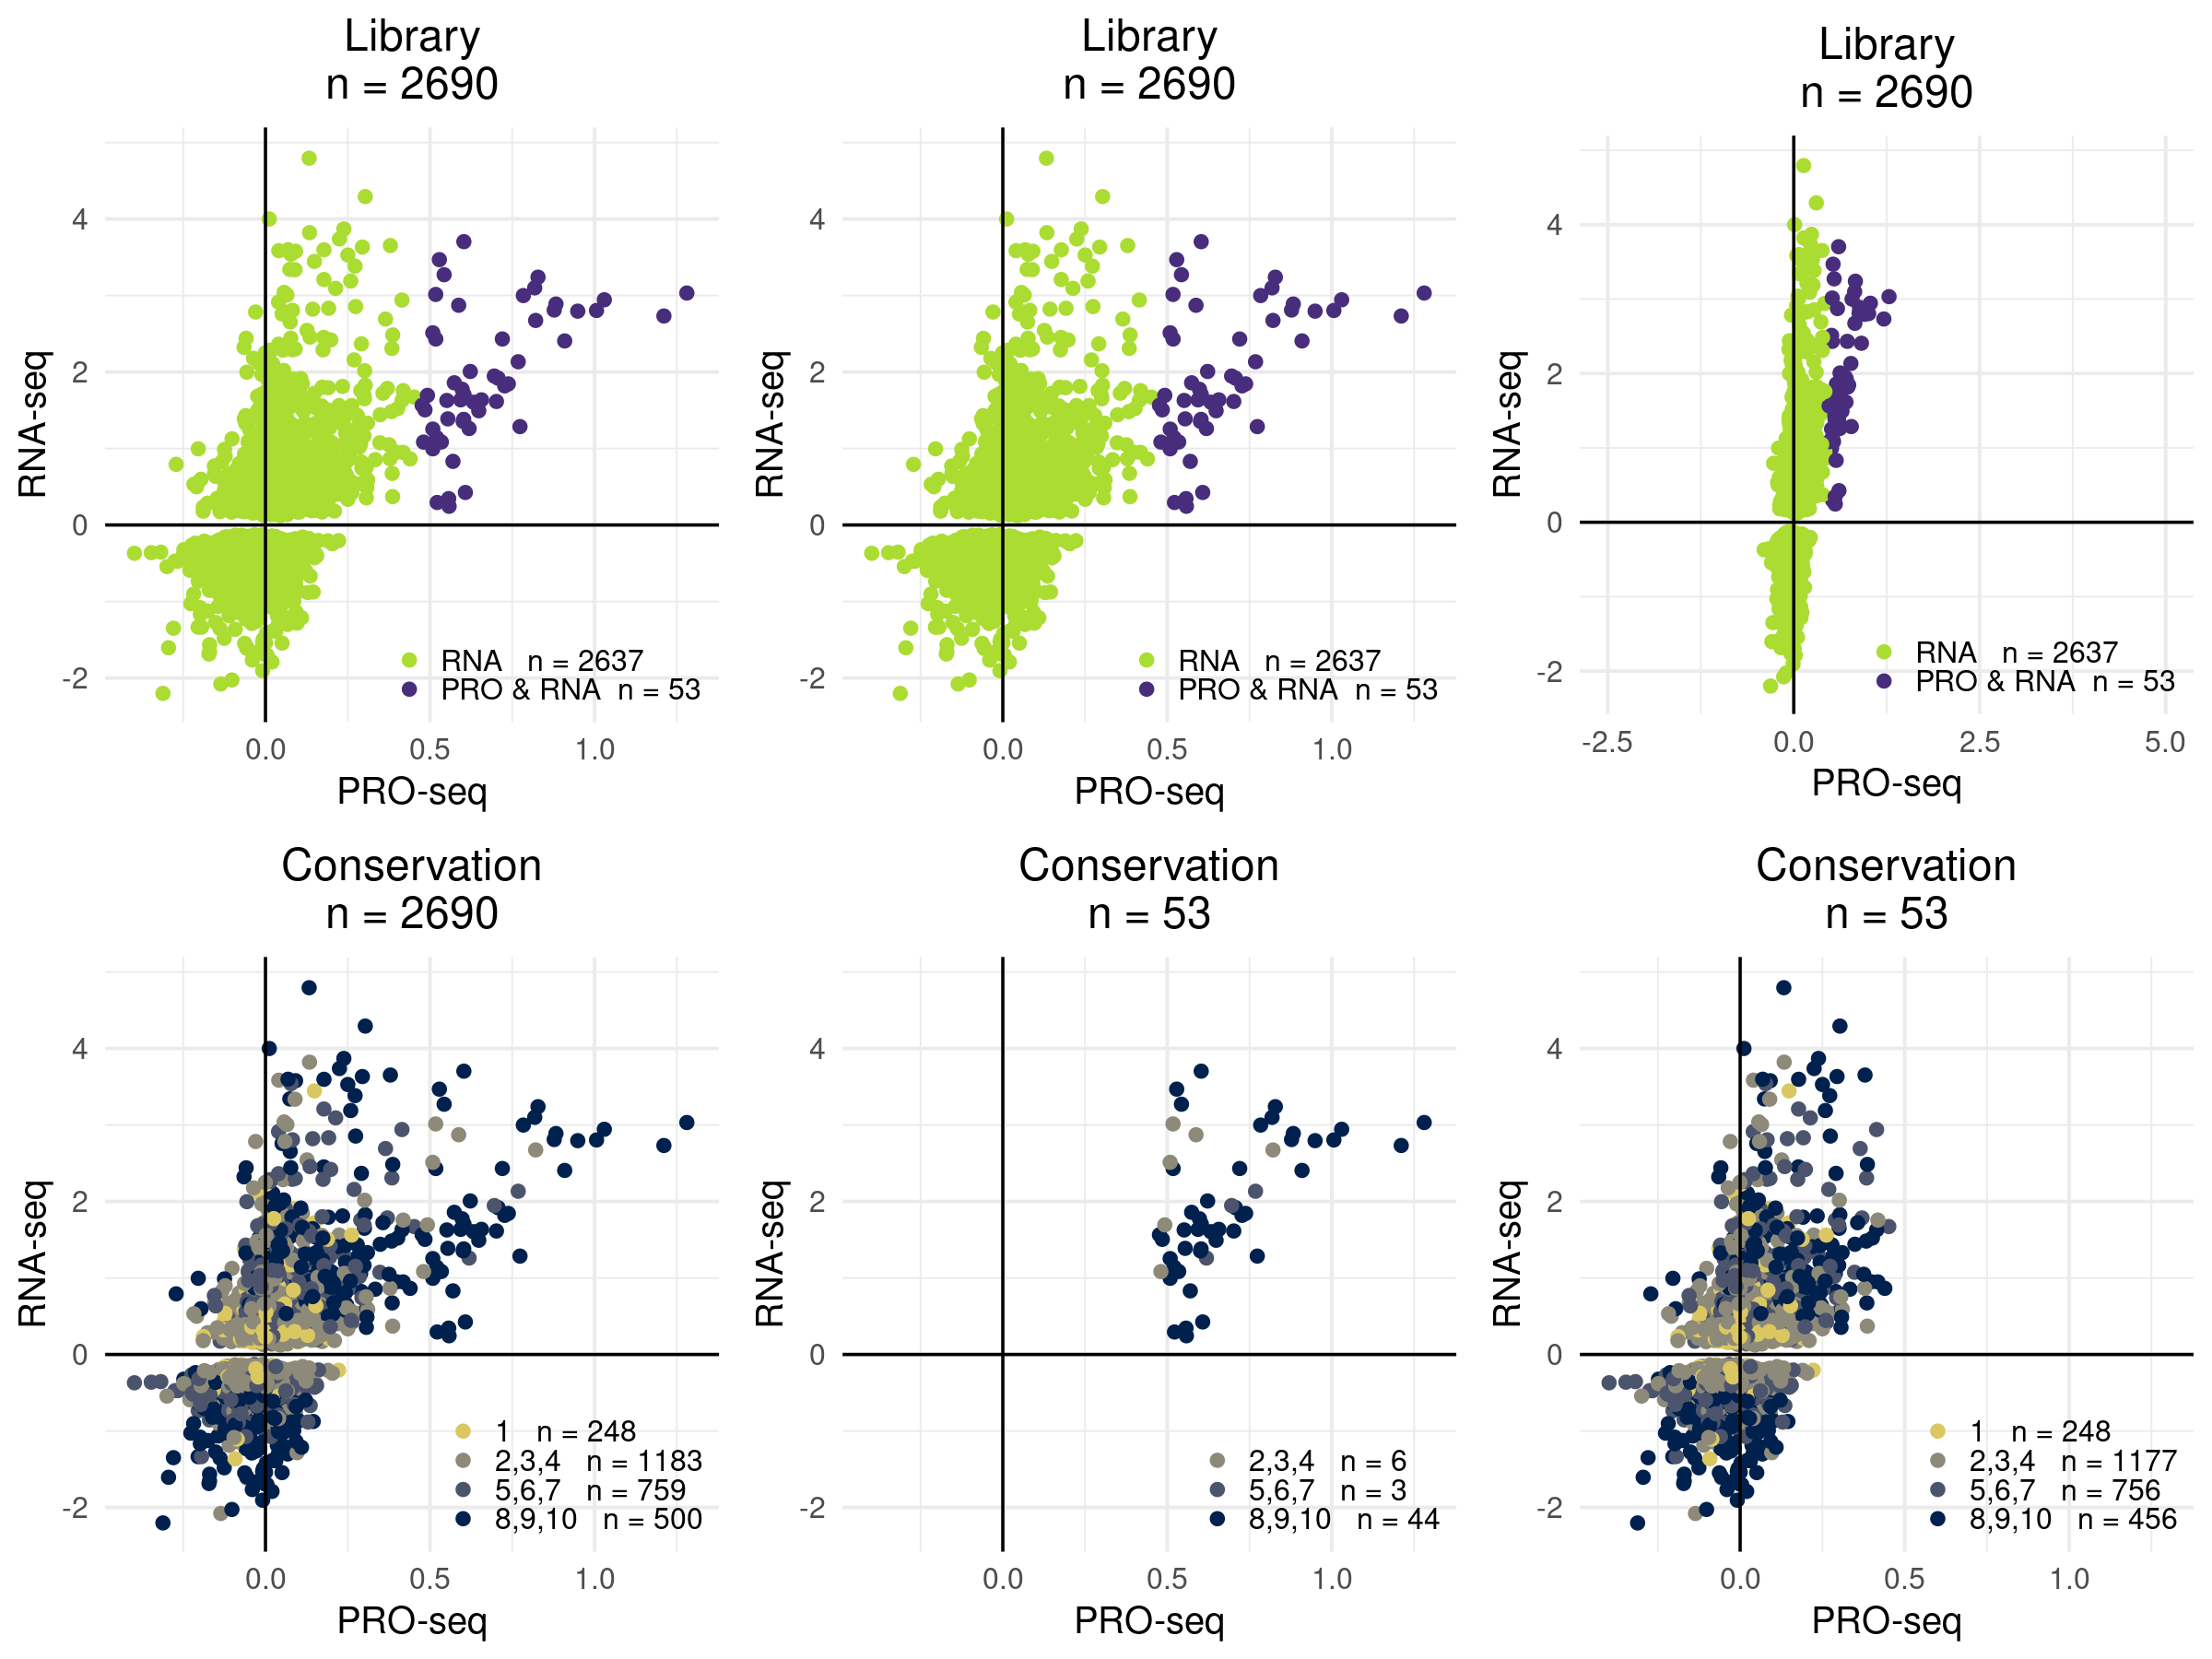

In [5]:
species <- "Human"

# Initializes and fills a data frame with the log2FoldChange from RNA- and PRO-seq.
colNames <- c("RNA_log2FoldChange","PRO_log2FoldChange","RNA_sig","PRO_sig","both_sig","label_sig","motifTSS","numberRNA","numberPRO")
correlation_df <- data.frame(matrix(FALSE, ncol = length(colNames), nrow = dim(eval(as.symbol(paste0("results_all_PRO_", species))))[1]))
colnames(correlation_df) <- colNames
rownames(correlation_df) <- rownames(eval(as.symbol(paste0("results_all_PRO_", species))))
correlation_df$RNA_log2FoldChange <- eval(as.symbol(paste0("results_all_RNA_", species)))$log2FoldChange
correlation_df$PRO_log2FoldChange <- eval(as.symbol(paste0("results_all_PRO_", species)))$log2FoldChange

# Subsets data frame so that it only contains genes that are significant in either RNA-seq or PRO-seq.
uniqueNames <- unique(c(eval(as.symbol(paste0("p53_names_RNA_", species))),
                        eval(as.symbol(paste0("p53_names_PRO_", species)))))
correlation_df <- correlation_df[uniqueNames,]

# Determines if each gene has an associated TP53 motif in its TSS.
TSS_TP53 <- read.table(paste0("/scratch/Users/dara6367/PRO-seq_interspecies-nutlin/Bidirectional-Flow/",species,"/fimo/RNA-",species,"-TSS_TP53_M06704_1.1e-5.txt"), 
                         header = TRUE, sep = "\t", fill = TRUE, stringsAsFactors = FALSE, na.strings = "")
TSS_TP53_names <- unique(TSS_TP53$sequence_name)
correlation_df$motifTSS <- rownames(correlation_df) %in% TSS_TP53_names

# Determines if each gene is statistically significant in either RNA-seq or PRO-seq.
correlation_df$RNA_sig <- rownames(correlation_df) %in% eval(as.symbol(paste0("p53_names_RNA_", species)))
correlation_df$PRO_sig <- rownames(correlation_df) %in% eval(as.symbol(paste0("p53_names_PRO_", species)))

for(gene in rownames(correlation_df)) {
    # Determines if each gene is significant in either library type or both.
    if (correlation_df[gene,"RNA_sig"] & correlation_df[gene,"PRO_sig"])
    { correlation_df[gene,"both_sig"] <- TRUE
      correlation_df[gene,"label_sig"] <- "both"}
    if (isTRUE(correlation_df[gene,"RNA_sig"]) & 
        !isTRUE(correlation_df[gene,"PRO_sig"]))
    { correlation_df[gene,"label_sig"] <- "RNA" }
    if (!isTRUE(correlation_df[gene,"RNA_sig"]) & 
        isTRUE(correlation_df[gene,"PRO_sig"]))
    { correlation_df[gene,"label_sig"] <- "both" }
    # Determines the number of species where the gene is significant in RNA-seq.
    if (genes_sig_all_RNA[gene,"nAnthropoids"] == 0 | 
        genes_sig_all_RNA[gene,"nAnthropoids"] == 1) 
        { correlation_df[gene,"numberRNA"] <- "1" }
    if (genes_sig_all_RNA[gene,"nAnthropoids"] == 2 | 
        genes_sig_all_RNA[gene,"nAnthropoids"] == 3 | 
        genes_sig_all_RNA[gene,"nAnthropoids"] == 4) 
        { correlation_df[gene,"numberRNA"] <- "2_3_4" }
    if (genes_sig_all_RNA[gene,"nAnthropoids"] == 5 | 
        genes_sig_all_RNA[gene,"nAnthropoids"] == 6 | 
        genes_sig_all_RNA[gene,"nAnthropoids"] == 7)
        { correlation_df[gene,"numberRNA"] <- "5_6_7" }
    if (genes_sig_all_RNA[gene,"nAnthropoids"] == 8 | 
        genes_sig_all_RNA[gene,"nAnthropoids"] == 9 | 
        genes_sig_all_RNA[gene,"nAnthropoids"] == 10)
        { correlation_df[gene,"numberRNA"] <- "8_9_10" }
     # Determines the number of species where the gene is significant in PRO-seq.
    if (genes_sig_all_PRO[gene,"nAnthropoids"] == 0 | 
        genes_sig_all_PRO[gene,"nAnthropoids"] == 1) 
        { correlation_df[gene,"numberPRO"] <- "1" }
    if (genes_sig_all_PRO[gene,"nAnthropoids"] == 2 | 
        genes_sig_all_PRO[gene,"nAnthropoids"] == 3 | 
        genes_sig_all_PRO[gene,"nAnthropoids"] == 4) 
        { correlation_df[gene,"numberPRO"] <- "2_3_4" }
    if (genes_sig_all_PRO[gene,"nAnthropoids"] == 5 | 
        genes_sig_all_PRO[gene,"nAnthropoids"] == 6 | 
        genes_sig_all_PRO[gene,"nAnthropoids"] == 7)
        { correlation_df[gene,"numberPRO"] <- "5_6_7" }
    if (genes_sig_all_PRO[gene,"nAnthropoids"] == 8 | 
        genes_sig_all_PRO[gene,"nAnthropoids"] == 9 | 
        genes_sig_all_PRO[gene,"nAnthropoids"] == 10)
        { correlation_df[gene,"numberPRO"] <- "8_9_10" }
}

# Removes entries that have NA in their PRO-seq log2FoldChange.
correlation_df <- correlation_df[complete.cases(correlation_df$PRO_log2FoldChange),]

# Subsets data frame so that it only contains gene significant in PRO-seq.
correlation_df_PRO <- correlation_df[correlation_df$label_sig == "PRO" | correlation_df$label_sig == "both",]

# Subsets data frame so that it only contains gene significant in RNA-seq.
correlation_df_RNA <- correlation_df[correlation_df$label_sig == "RNA",]

# Stores plots.
RNA_max <- max(correlation_df$RNA_log2FoldChange) + (max(correlation_df$RNA_log2FoldChange) * 0.01)
RNA_min <- min(correlation_df$RNA_log2FoldChange) + (min(correlation_df$RNA_log2FoldChange) * 0.01)
PRO_max <- max(correlation_df$PRO_log2FoldChange) + (max(correlation_df$PRO_log2FoldChange) * 0.01)
PRO_min <- min(correlation_df$PRO_log2FoldChange) + (min(correlation_df$PRO_log2FoldChange) * 0.01)

fcPlot_union_library <- ggplot(data = correlation_df, aes(x = PRO_log2FoldChange, 
                                                          y = RNA_log2FoldChange, 
                                                          color = label_sig)) +
    geom_point(shape = 19, size = 4) +
    xlim(PRO_min,PRO_max) +
    ylim(RNA_min,RNA_max) +
    theme_minimal(base_size = 24) +
    geom_hline(yintercept = 0, color = "black", size = 1) +
    geom_vline(xintercept = 0, color = "black", size = 1) +
    labs(title = paste0("Library\nn = ",dim(correlation_df)[1]),
        x = "PRO-seq",
        y = "RNA-seq") +
    scale_color_manual("",
        labels = c(paste0("RNA   n = ",as.character(table(correlation_df$label_sig)["RNA"])),
                   paste0("PRO & RNA  n = ",as.character(table(correlation_df$label_sig)["both"]))), 
        breaks = c("RNA","both"),
        values = c("#AADC32FF","#472D7BFF")) +
    theme(legend.position = c(1,0), legend.justification = c(1,0)) +
    theme(plot.title = element_text(hjust = 0.5),
          axis.line = element_blank())

fcPlot_union_library_c <- ggplot(data = correlation_df, aes(x = PRO_log2FoldChange, 
                                                          y = RNA_log2FoldChange, 
                                                          color = label_sig)) +
    geom_point(shape = 19, size = 4) +
    xlim(-2.5,5) +
    ylim(RNA_min,RNA_max) +
    theme_minimal(base_size = 24) +
    geom_hline(yintercept = 0, color = "black", size = 1) +
    geom_vline(xintercept = 0, color = "black", size = 1) +
    labs(title = paste0("Library\nn = ",dim(correlation_df)[1]),
        x = "PRO-seq",
        y = "RNA-seq") +
    coord_fixed() +
    scale_color_manual("",
        labels = c(paste0("RNA   n = ",as.character(table(correlation_df$label_sig)["RNA"])),
                   paste0("PRO & RNA  n = ",as.character(table(correlation_df$label_sig)["both"]))), 
        breaks = c("RNA","both"),
        values = c("#AADC32FF","#472D7BFF")) +
    theme(legend.position = c(1,0), legend.justification = c(1,0)) +
    theme(plot.title = element_text(hjust = 0.5),
          axis.line = element_blank())


fcPlot_union_conservation <- ggplot(data = correlation_df, aes(x = PRO_log2FoldChange, 
                                                          y = RNA_log2FoldChange, 
                                                          color = numberRNA)) +
    geom_point(shape = 19, size = 4) +
    xlim(PRO_min,PRO_max) +
    ylim(RNA_min,RNA_max) +
    theme_minimal(base_size = 24) +
    geom_hline(yintercept = 0, color = "black", size = 1) +
    geom_vline(xintercept = 0, color = "black", size = 1) +
    labs(title = paste0("Conservation\nn = ",dim(correlation_df)[1]),
        x = "PRO-seq",
        y = "RNA-seq") +
    scale_color_manual("",
        labels = c(paste0("1   n = ",as.character(table(correlation_df$numberRNA)["1"])),
                   paste0("2,3,4   n = ",as.character(table(correlation_df$numberRNA)["2_3_4"])),
                   paste0("5,6,7   n = ",as.character(table(correlation_df$numberRNA)["5_6_7"])),
                   paste0("8,9,10   n = ",as.character(table(correlation_df$numberRNA)["8_9_10"]))), 
        breaks = c("1","2_3_4","5_6_7","8_9_10"),
        values = c("#DBC761FF","#8E8A79FF","#4B546CFF","#00204DFF")) +
    theme(legend.position = c(1,0), legend.justification = c(1,0)) +
    theme(plot.title = element_text(hjust = 0.5),
          axis.line = element_blank())

fcPlot_PRO_conservation <- ggplot(data = correlation_df_PRO, aes(x = PRO_log2FoldChange, 
                                                          y = RNA_log2FoldChange, 
                                                          color = numberRNA)) +
    geom_point(shape = 19, size = 4) +
    xlim(PRO_min,PRO_max) +
    ylim(RNA_min,RNA_max) +
    theme_minimal(base_size = 24) +
    geom_hline(yintercept = 0, color = "black", size = 1) +
    geom_vline(xintercept = 0, color = "black", size = 1) +
    labs(title = paste0("Conservation\nn = ",dim(correlation_df_PRO)[1]),
        x = "PRO-seq",
        y = "RNA-seq") +
    scale_color_manual("",
        labels = c(paste0("1   n = ",as.character(table(correlation_df_PRO$numberRNA)["1"])),
                   paste0("2,3,4   n = ",as.character(table(correlation_df_PRO$numberRNA)["2_3_4"])),
                   paste0("5,6,7   n = ",as.character(table(correlation_df_PRO$numberRNA)["5_6_7"])),
                   paste0("8,9,10   n = ",as.character(table(correlation_df_PRO$numberRNA)["8_9_10"]))), 
        breaks = c("1","2_3_4","5_6_7","8_9_10"),
        values = c("#DBC761FF","#8E8A79FF","#4B546CFF","#00204DFF")) +
    theme(legend.position = c(1,0), legend.justification = c(1,0)) +
    theme(plot.title = element_text(hjust = 0.5),
          axis.line = element_blank())

fcPlot_RNA_conservation <- ggplot(data = correlation_df_RNA, aes(x = PRO_log2FoldChange, 
                                                          y = RNA_log2FoldChange, 
                                                          color = numberRNA)) +
    geom_point(shape = 19, size = 4) +
    xlim(PRO_min,PRO_max) +
    ylim(RNA_min,RNA_max) +
    theme_minimal(base_size = 24) +
    geom_hline(yintercept = 0, color = "black", size = 1) +
    geom_vline(xintercept = 0, color = "black", size = 1) +
    labs(title = paste0("Conservation\nn = ",dim(correlation_df_PRO)[1]),
        x = "PRO-seq",
        y = "RNA-seq") +
    scale_color_manual("",
        labels = c(paste0("1   n = ",as.character(table(correlation_df_RNA$numberRNA)["1"])),
                   paste0("2,3,4   n = ",as.character(table(correlation_df_RNA$numberRNA)["2_3_4"])),
                   paste0("5,6,7   n = ",as.character(table(correlation_df_RNA$numberRNA)["5_6_7"])),
                   paste0("8,9,10   n = ",as.character(table(correlation_df_RNA$numberRNA)["8_9_10"]))), 
        breaks = c("1","2_3_4","5_6_7","8_9_10"),
        values = c("#DBC761FF","#8E8A79FF","#4B546CFF","#00204DFF")) +
    theme(legend.position = c(1,0), legend.justification = c(1,0)) +
    theme(plot.title = element_text(hjust = 0.5),
          axis.line = element_blank())

# Arranges all plots onto a single grid.
options(repr.plot.width = 20, repr.plot.height = 15)
grid.arrange(fcPlot_union_library,
             fcPlot_union_library,
             fcPlot_union_library_c,
             fcPlot_union_conservation,
             fcPlot_PRO_conservation,
             fcPlot_RNA_conservation,
             ncol = 3, nrow = 2)

In [12]:
# Defines function that plots the log2FoldChange of RNA-seq and PRO-seq.

RNAvsPROscatterplot <- function(species) {

    # Initializes and fills a data frame with the log2FoldChange from RNA- and PRO-seq.
    colNames <- c("RNA_log2FoldChange","PRO_log2FoldChange","RNA_sig","PRO_sig","both_sig","label_sig","motifTSS","numberRNA","numberPRO")
    correlation_df <- data.frame(matrix(FALSE, ncol = length(colNames), nrow = dim(eval(as.symbol(paste0("results_all_PRO_", species))))[1]))
    colnames(correlation_df) <- colNames
    rownames(correlation_df) <- rownames(eval(as.symbol(paste0("results_all_PRO_", species))))
    correlation_df$RNA_log2FoldChange <- eval(as.symbol(paste0("results_all_RNA_", species)))$log2FoldChange
    correlation_df$PRO_log2FoldChange <- eval(as.symbol(paste0("results_all_PRO_", species)))$log2FoldChange

    # Subsets data frame so that it only contains genes that are significant in either RNA-seq or PRO-seq.
    uniqueNames <- unique(c(eval(as.symbol(paste0("p53_names_RNA_", species))),
                            eval(as.symbol(paste0("p53_names_PRO_", species)))))
    correlation_df <- correlation_df[uniqueNames,]

    # Determines if each gene has an associated TP53 motif in its TSS.
    TSS_TP53 <- read.table(paste0("/scratch/Users/dara6367/PRO-seq_interspecies-nutlin/Bidirectional-Flow/",species,"/fimo/RNA-",species,"-TSS_TP53_M06704_1.txt"), 
                             header = TRUE, sep = "\t", fill = TRUE, stringsAsFactors = FALSE, na.strings = "")
    TSS_TP53_names <- unique(TSS_TP53$sequence_name)
    correlation_df$motifTSS <- rownames(correlation_df) %in% TSS_TP53_names

    # Determines if each gene is statistically significant in either RNA-seq or PRO-seq.
    correlation_df$RNA_sig <- rownames(correlation_df) %in% eval(as.symbol(paste0("p53_names_RNA_", species)))
    correlation_df$PRO_sig <- rownames(correlation_df) %in% eval(as.symbol(paste0("p53_names_PRO_", species)))

    for(gene in rownames(correlation_df)) {
        # Determines if each gene is significant in either library type or both.
        if (correlation_df[gene,"RNA_sig"] & correlation_df[gene,"PRO_sig"])
        { correlation_df[gene,"both_sig"] <- TRUE
          correlation_df[gene,"label_sig"] <- "both"}
        if (isTRUE(correlation_df[gene,"RNA_sig"]) & 
            !isTRUE(correlation_df[gene,"PRO_sig"]))
        { correlation_df[gene,"label_sig"] <- "RNA" }
        if (!isTRUE(correlation_df[gene,"RNA_sig"]) & 
            isTRUE(correlation_df[gene,"PRO_sig"]))
        { correlation_df[gene,"label_sig"] <- "PRO" }
        # Determines the number of species where the gene is significant in RNA-seq.
        if (genes_sig_all_RNA[gene,"nAnthropoids"] == 0 | 
            genes_sig_all_RNA[gene,"nAnthropoids"] == 1) 
            { correlation_df[gene,"numberRNA"] <- "1" }
        if (genes_sig_all_RNA[gene,"nAnthropoids"] == 2 | 
            genes_sig_all_RNA[gene,"nAnthropoids"] == 3 | 
            genes_sig_all_RNA[gene,"nAnthropoids"] == 4) 
            { correlation_df[gene,"numberRNA"] <- "2_3_4" }
        if (genes_sig_all_RNA[gene,"nAnthropoids"] == 5 | 
            genes_sig_all_RNA[gene,"nAnthropoids"] == 6 | 
            genes_sig_all_RNA[gene,"nAnthropoids"] == 7)
            { correlation_df[gene,"numberRNA"] <- "5_6_7" }
        if (genes_sig_all_RNA[gene,"nAnthropoids"] == 8 | 
            genes_sig_all_RNA[gene,"nAnthropoids"] == 9 | 
            genes_sig_all_RNA[gene,"nAnthropoids"] == 10)
            { correlation_df[gene,"numberRNA"] <- "8_9_10" }
         # Determines the number of species where the gene is significant in PRO-seq.
        if (genes_sig_all_PRO[gene,"nAnthropoids"] == 0 | 
            genes_sig_all_PRO[gene,"nAnthropoids"] == 1) 
            { correlation_df[gene,"numberPRO"] <- "1" }
        if (genes_sig_all_PRO[gene,"nAnthropoids"] == 2 | 
            genes_sig_all_PRO[gene,"nAnthropoids"] == 3 | 
            genes_sig_all_PRO[gene,"nAnthropoids"] == 4) 
            { correlation_df[gene,"numberPRO"] <- "2_3_4" }
        if (genes_sig_all_PRO[gene,"nAnthropoids"] == 5 | 
            genes_sig_all_PRO[gene,"nAnthropoids"] == 6 | 
            genes_sig_all_PRO[gene,"nAnthropoids"] == 7)
            { correlation_df[gene,"numberPRO"] <- "5_6_7" }
        if (genes_sig_all_PRO[gene,"nAnthropoids"] == 8 | 
            genes_sig_all_PRO[gene,"nAnthropoids"] == 9 | 
            genes_sig_all_PRO[gene,"nAnthropoids"] == 10)
            { correlation_df[gene,"numberPRO"] <- "8_9_10" }
    }

    # Removes entries that have NA in their PRO-seq log2FoldChange.
    correlation_df <- correlation_df[complete.cases(correlation_df$PRO_log2FoldChange),]
    
    # Subsets data frame so that it only contains gene significant in PRO-seq.
    correlation_df_PRO <- correlation_df[correlation_df$label_sig == "PRO" | correlation_df$label_sig == "both",]

    # Stores plots.
    RNA_max <- max(correlation_df$RNA_log2FoldChange) + (max(correlation_df$RNA_log2FoldChange) * 0.01)
    RNA_min <- min(correlation_df$RNA_log2FoldChange) + (min(correlation_df$RNA_log2FoldChange) * 0.01)
    PRO_max <- max(correlation_df$PRO_log2FoldChange) + (max(correlation_df$PRO_log2FoldChange) * 0.01)
    PRO_min <- min(correlation_df$PRO_log2FoldChange) + (min(correlation_df$PRO_log2FoldChange) * 0.01)

    fcPlot_union_library <- ggplot(data = correlation_df, aes(x = PRO_log2FoldChange, 
                                                              y = RNA_log2FoldChange, 
                                                              color = label_sig)) +
        geom_point(shape = 19, size = 4) +
        xlim(PRO_min,PRO_max) +
        ylim(RNA_min,RNA_max) +
        theme_minimal(base_size = 20) +
        geom_hline(yintercept = 0, color = "black", size = 1) +
        geom_vline(xintercept = 0, color = "black", size = 1) +
        labs(title = paste0("Library\nn = ",dim(correlation_df)[1]),
            x = "PRO-seq",
            y = "RNA-seq") +
        scale_color_manual("",
            labels = c(paste0("RNA   n = ",as.character(table(correlation_df$label_sig)["RNA"])),
                       paste0("PRO   n = ",as.character(table(correlation_df$label_sig)["PRO"])),
                       paste0("Both  n = ",as.character(table(correlation_df$label_sig)["both"]))), 
            breaks = c("RNA","PRO","both"),
            values = c("#AADC32FF","#472D7BFF","#21908CFF")) +
        theme(legend.position = c(1,0), legend.justification = c(1,0)) +
        theme(plot.title = element_text(hjust = 0.5),
              axis.line = element_blank())

    fcPlot_union_motif <- ggplot(data = correlation_df, aes(x = PRO_log2FoldChange, 
                                                              y = RNA_log2FoldChange, 
                                                              color = motifTSS)) +
        geom_point(shape = 19, size = 4) +
        xlim(PRO_min,PRO_max) +
        ylim(RNA_min,RNA_max) +
        theme_minimal(base_size = 20) +
        geom_hline(yintercept = 0, color = "black", size = 1) +
        geom_vline(xintercept = 0, color = "black", size = 1) +
        labs(title = paste0("Motif\nn = ",dim(correlation_df)[1]),
            x = "PRO-seq",
            y = "RNA-seq") +
        scale_color_manual("",
            labels = c(paste0("With motif   n = ",as.character(table(correlation_df$motifTSS)["TRUE"])),
                       paste0("Without motif   n = ",as.character(table(correlation_df$motifTSS)["FALSE"]))), 
            breaks = c("TRUE","FALSE"),
            values = c("#611F53FF","#F4875EFF")) +
        theme(legend.position = c(1,0), legend.justification = c(1,0)) +
        theme(plot.title = element_text(hjust = 0.5),
              axis.line = element_blank())

    fcPlot_union_conservation <- ggplot(data = correlation_df, aes(x = PRO_log2FoldChange, 
                                                              y = RNA_log2FoldChange, 
                                                              color = numberRNA)) +
        geom_point(shape = 19, size = 4) +
        xlim(PRO_min,PRO_max) +
        ylim(RNA_min,RNA_max) +
        theme_minimal(base_size = 20) +
        geom_hline(yintercept = 0, color = "black", size = 1) +
        geom_vline(xintercept = 0, color = "black", size = 1) +
        labs(title = paste0("Conservation\nn = ",dim(correlation_df)[1]),
            x = "PRO-seq",
            y = "RNA-seq") +
        scale_color_manual("",
            labels = c(paste0("1   n = ",as.character(table(correlation_df$numberRNA)["1"])),
                       paste0("2,3,4   n = ",as.character(table(correlation_df$numberRNA)["2_3_4"])),
                       paste0("5,6,7   n = ",as.character(table(correlation_df$numberRNA)["5_6_7"])),
                       paste0("8,9,10   n = ",as.character(table(correlation_df$numberRNA)["8_9_10"]))), 
            breaks = c("1","2_3_4","5_6_7","8_9_10"),
            values = c("#DBC761FF","#8E8A79FF","#4B546CFF","#00204DFF")) +
        theme(legend.position = c(1,0), legend.justification = c(1,0)) +
        theme(plot.title = element_text(hjust = 0.5),
              axis.line = element_blank())

    fcPlot_PRO_library <- ggplot(data = correlation_df_PRO, aes(x = PRO_log2FoldChange, 
                                                              y = RNA_log2FoldChange, 
                                                              color = label_sig)) +
        geom_point(shape = 19, size = 4) +
        xlim(PRO_min,PRO_max) +
        ylim(RNA_min,RNA_max) +
        theme_minimal(base_size = 20) +
        geom_hline(yintercept = 0, color = "black", size = 1) +
        geom_vline(xintercept = 0, color = "black", size = 1) +
        labs(title = paste0("Library\nn = ",dim(correlation_df_PRO)[1]),
            x = "PRO-seq",
            y = "RNA-seq") +
        scale_color_manual("",
            labels = c(paste0("PRO   n = ",as.character(table(correlation_df_PRO$label_sig)["PRO"])),
                       paste0("Both  n = ",as.character(table(correlation_df_PRO$label_sig)["both"]))), 
            breaks = c("PRO","both"),
            values = c("#472D7BFF","#21908CFF")) +
        theme(legend.position = c(1,0), legend.justification = c(1,0)) +
        theme(plot.title = element_text(hjust = 0.5),
              axis.line = element_blank())

    fcPlot_PRO_motif <- ggplot(data = correlation_df_PRO, aes(x = PRO_log2FoldChange, 
                                                              y = RNA_log2FoldChange, 
                                                              color = motifTSS)) +
        geom_point(shape = 19, size = 4) +
        xlim(PRO_min,PRO_max) +
        ylim(RNA_min,RNA_max) +
        theme_minimal(base_size = 20) +
        geom_hline(yintercept = 0, color = "black", size = 1) +
        geom_vline(xintercept = 0, color = "black", size = 1) +
        labs(title = paste0("Motif\nn = ",dim(correlation_df_PRO)[1]),
            x = "PRO-seq",
            y = "RNA-seq") +
        scale_color_manual("",
            labels = c(paste0("With motif   n = ",as.character(table(correlation_df_PRO$motifTSS)["TRUE"])),
                       paste0("Without motif   n = ",as.character(table(correlation_df_PRO$motifTSS)["FALSE"]))), 
            breaks = c("TRUE","FALSE"),
            values = c("#611F53FF","#F4875EFF")) +
        theme(legend.position = c(1,0), legend.justification = c(1,0)) +
        theme(plot.title = element_text(hjust = 0.5),
              axis.line = element_blank())

    fcPlot_PRO_conservation <- ggplot(data = correlation_df_PRO, aes(x = PRO_log2FoldChange, 
                                                              y = RNA_log2FoldChange, 
                                                              color = numberRNA)) +
        geom_point(shape = 19, size = 4) +
        xlim(PRO_min,PRO_max) +
        ylim(RNA_min,RNA_max) +
        theme_minimal(base_size = 20) +
        geom_hline(yintercept = 0, color = "black", size = 1) +
        geom_vline(xintercept = 0, color = "black", size = 1) +
        labs(title = paste0("Conservation\nn = ",dim(correlation_df_PRO)[1]),
            x = "PRO-seq",
            y = "RNA-seq") +
        scale_color_manual("",
            labels = c(paste0("1   n = ",as.character(table(correlation_df_PRO$numberPRO)["1"])),
                       paste0("2,3,4   n = ",as.character(table(correlation_df_PRO$numberPRO)["2_3_4"])),
                       paste0("5,6,7   n = ",as.character(table(correlation_df_PRO$numberPRO)["5_6_7"])),
                       paste0("8,9,10   n = ",as.character(table(correlation_df_PRO$numberPRO)["8_9_10"]))), 
            breaks = c("1","2_3_4","5_6_7","8_9_10"),
            values = c("#DBC761FF","#8E8A79FF","#4B546CFF","#00204DFF")) +
        theme(legend.position = c(1,0), legend.justification = c(1,0)) +
        theme(plot.title = element_text(hjust = 0.5),
              axis.line = element_blank())

    # Arranges all plots onto a single grid.
    options(repr.plot.width = 20, repr.plot.height = 16)
    grid.arrange(fcPlot_union_library,
                 fcPlot_union_motif,
                 fcPlot_union_conservation,
                 fcPlot_PRO_library,
                 fcPlot_PRO_motif,
                 fcPlot_PRO_conservation,
                 ncol = 3, nrow = 2, 
                 top = textGrob(paste0(species,"\nPRO-seq vs RNA-seq\n"), 
                                gp = gpar(fontsize = 35)))
}

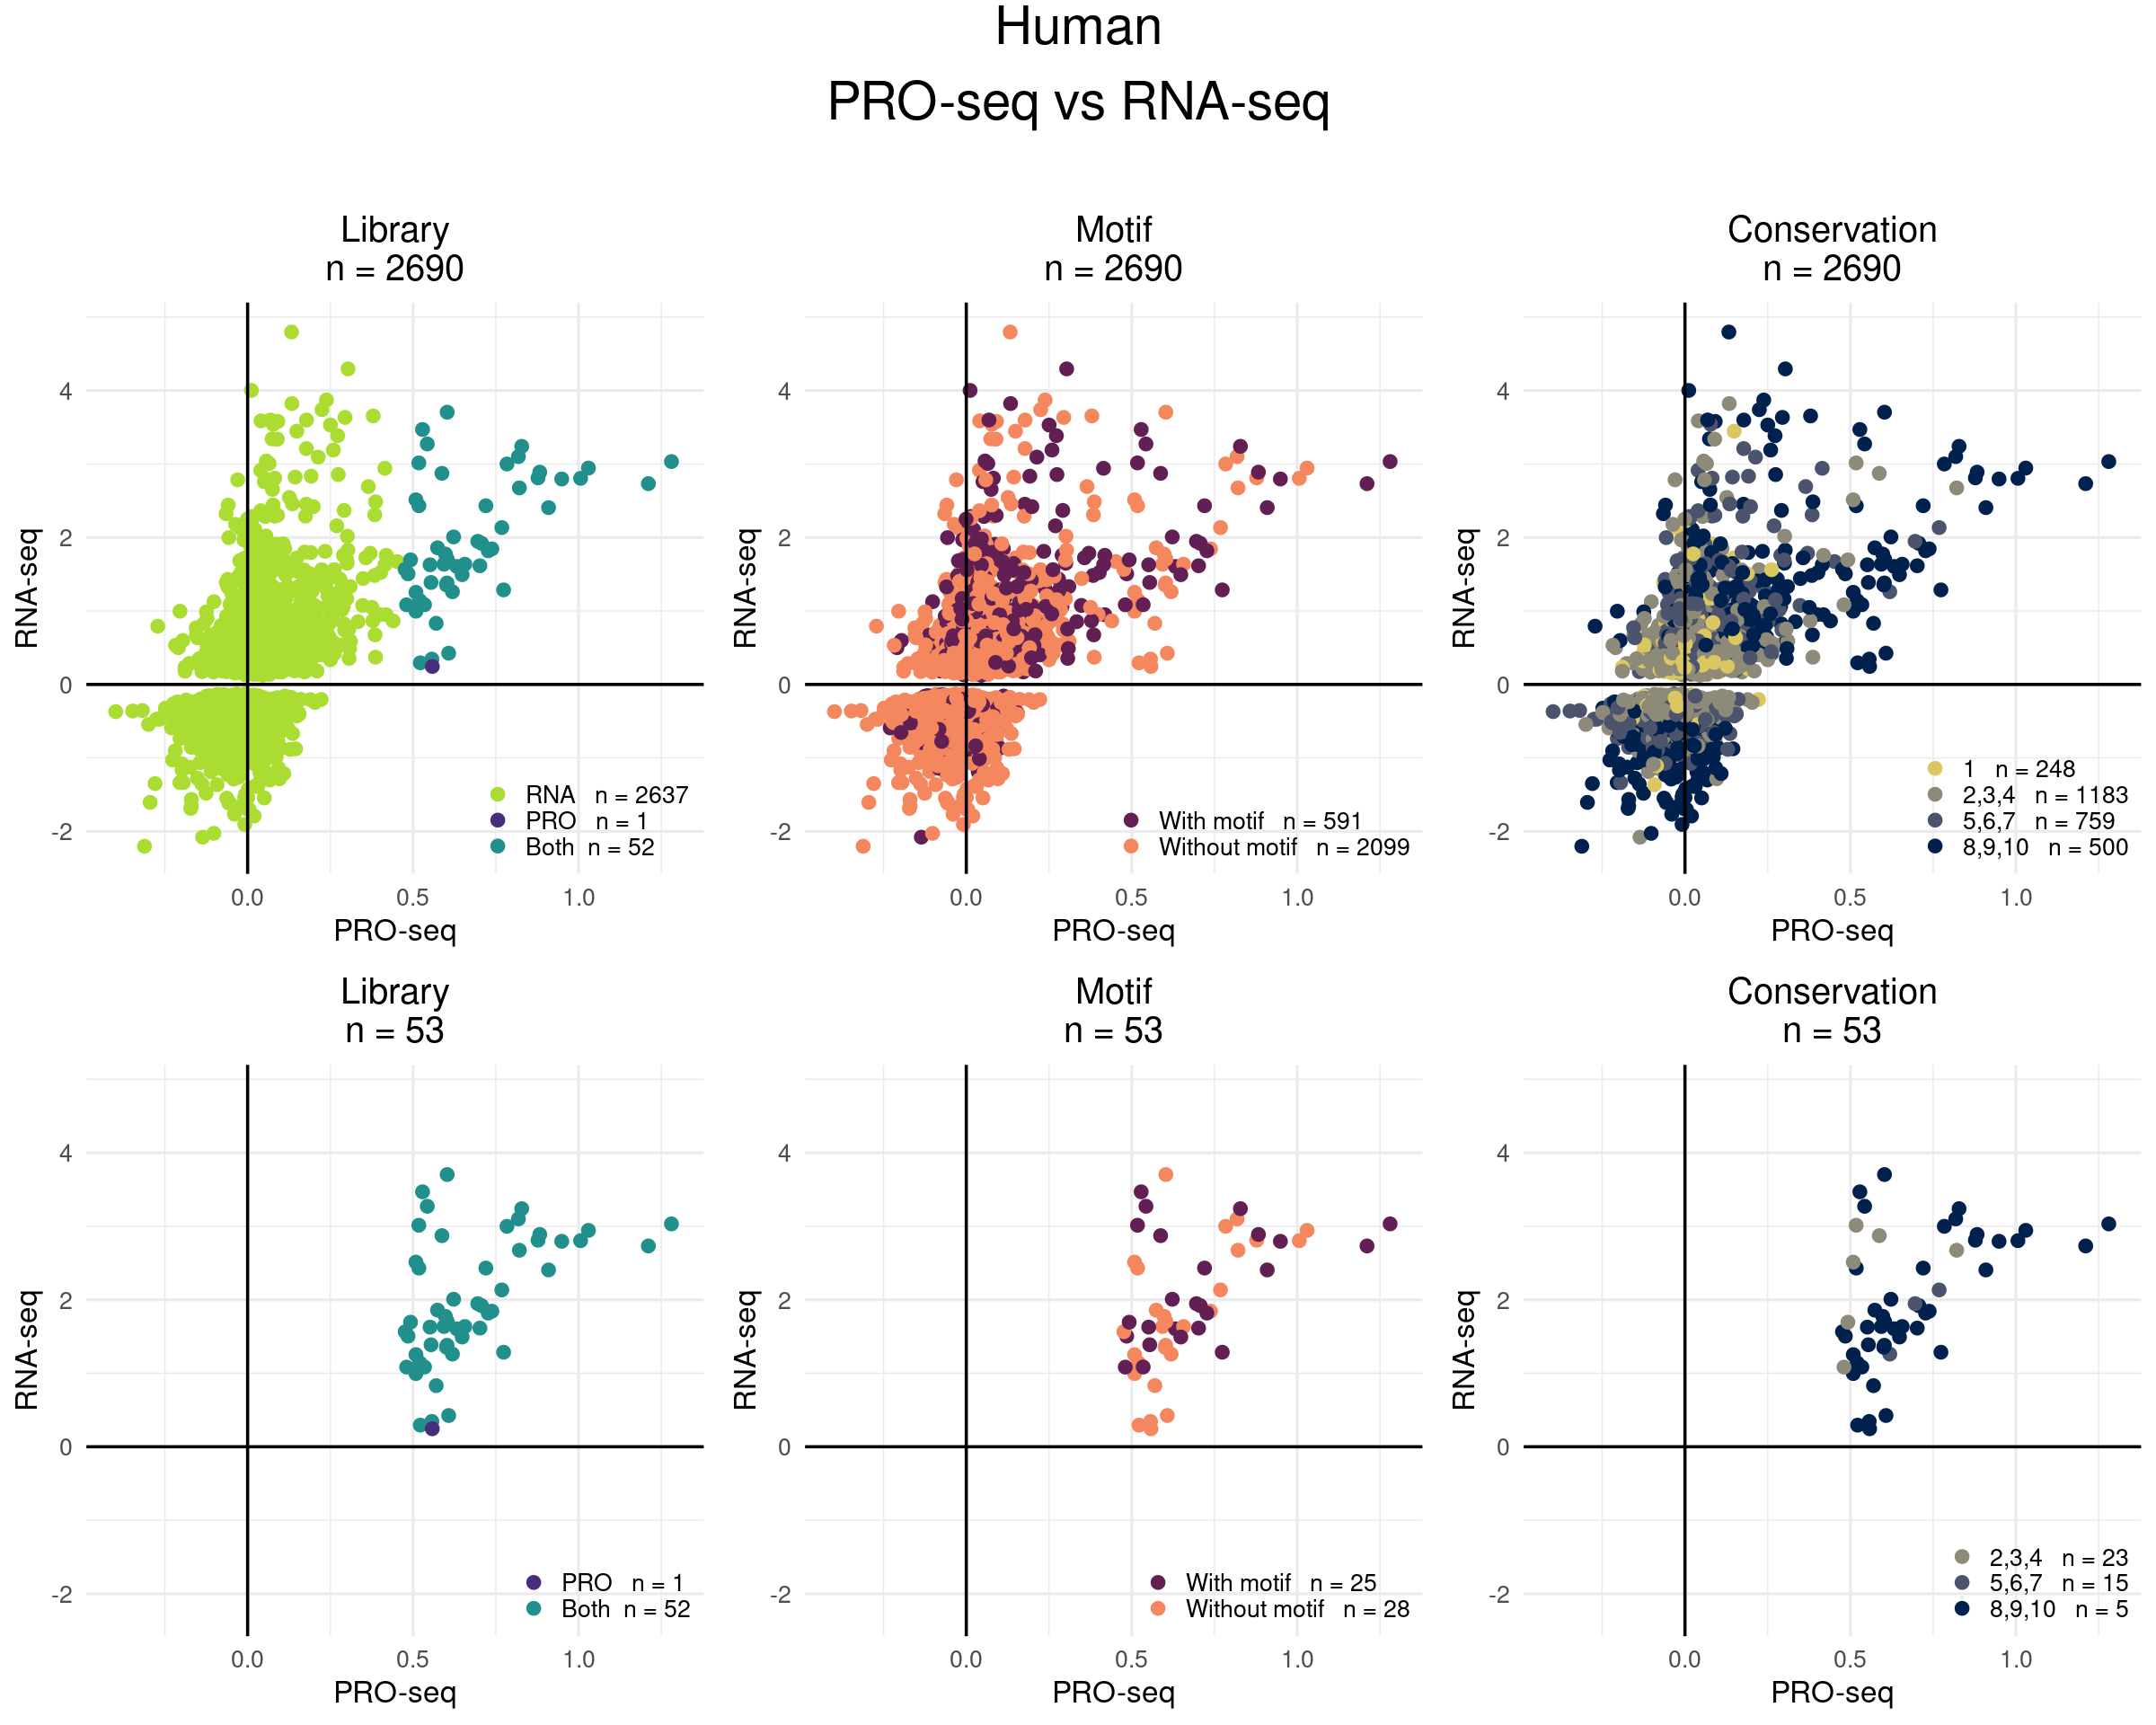

In [11]:
RNAvsPROscatterplot("Human")

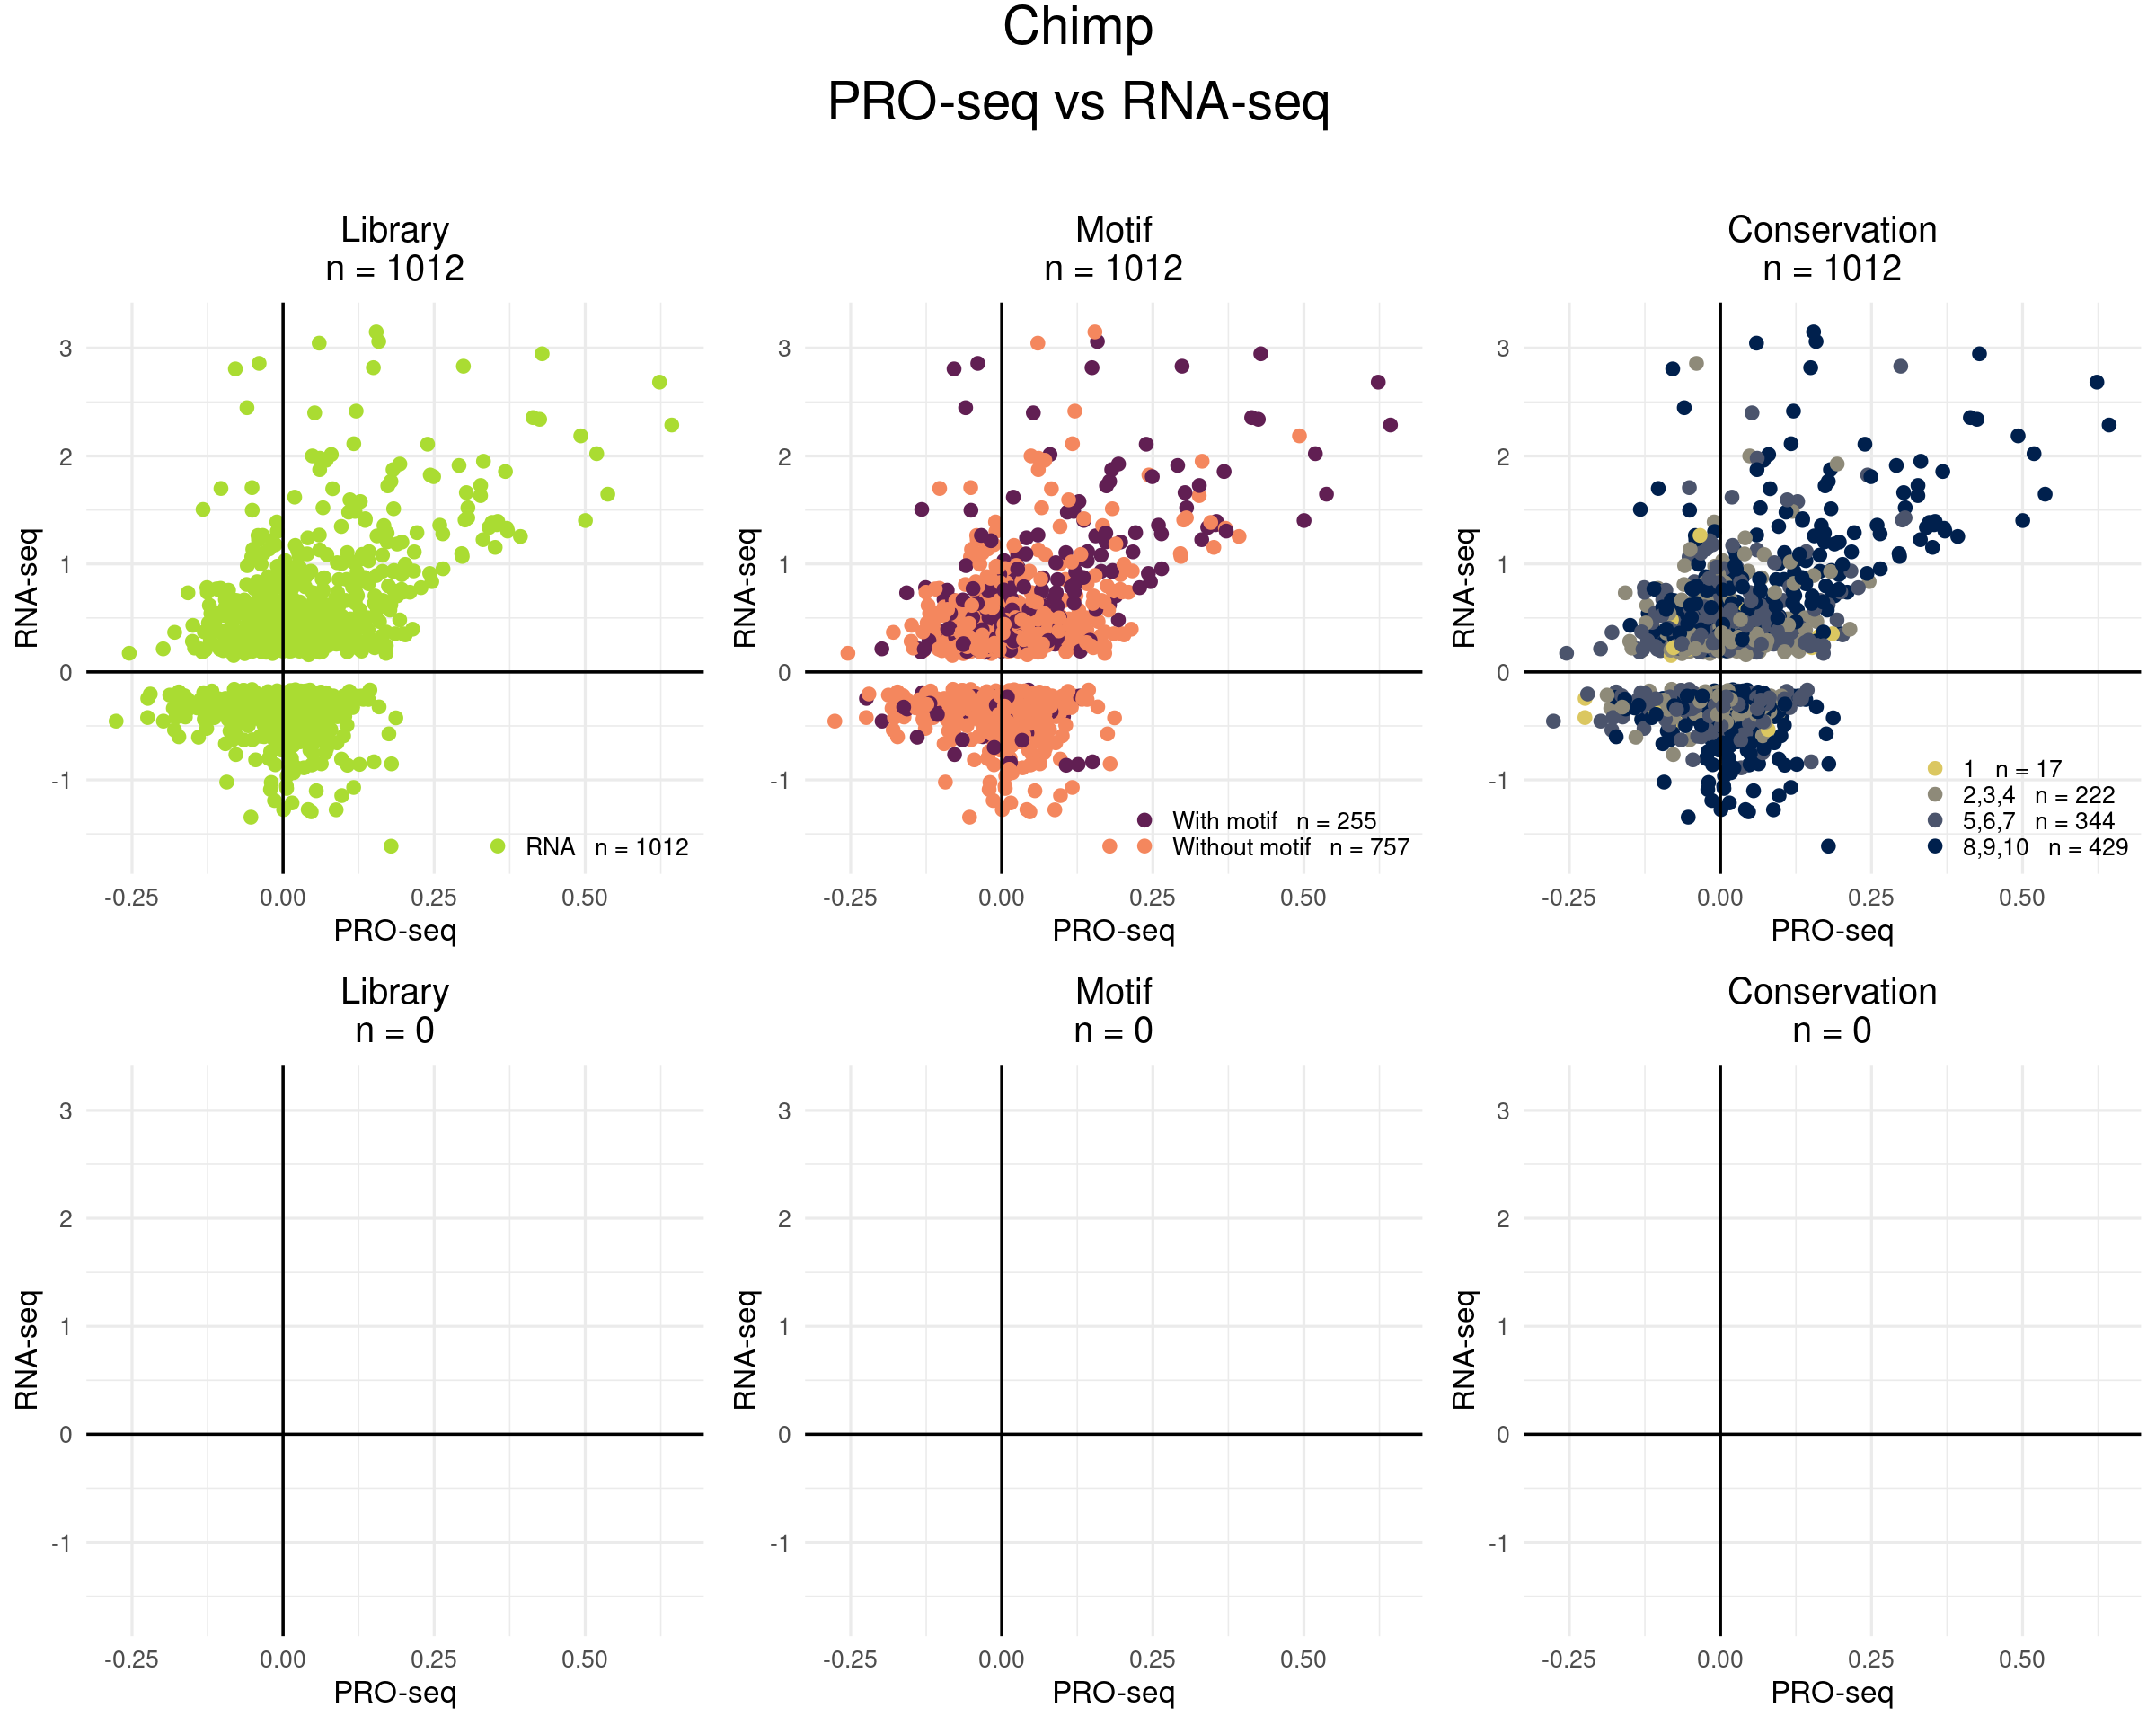

In [13]:
RNAvsPROscatterplot("Chimp")

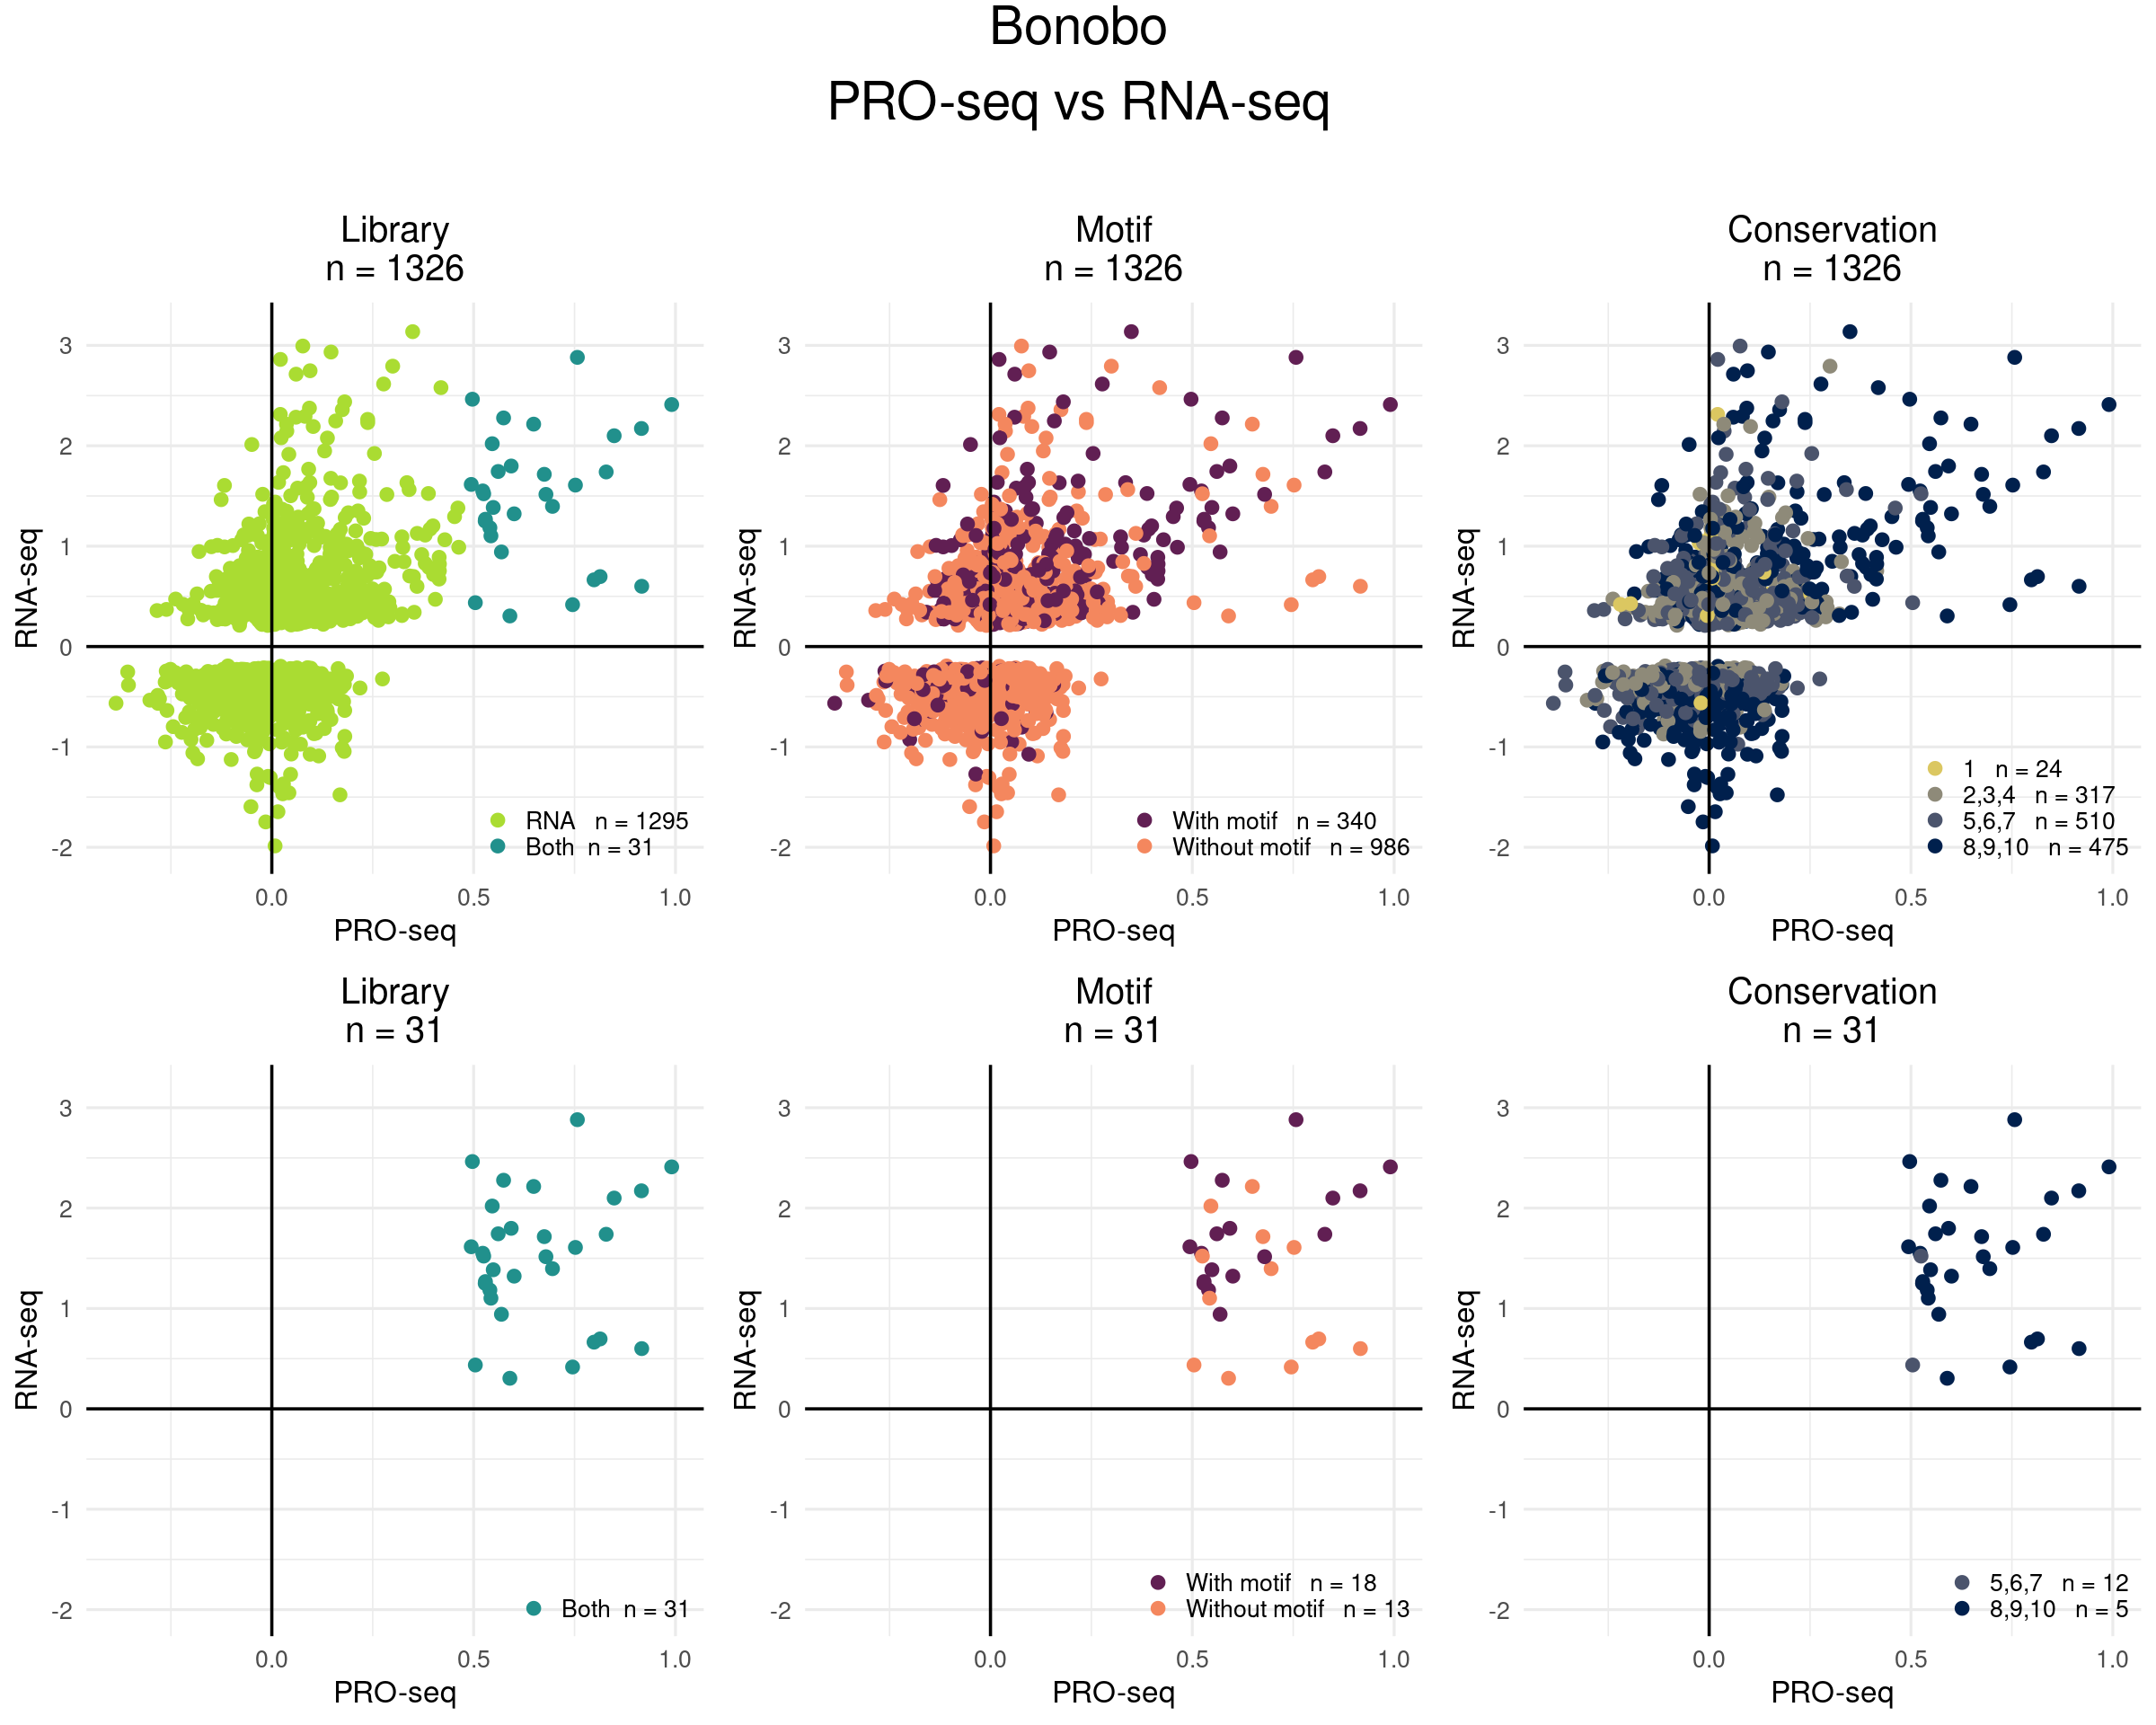

In [14]:
RNAvsPROscatterplot("Bonobo")

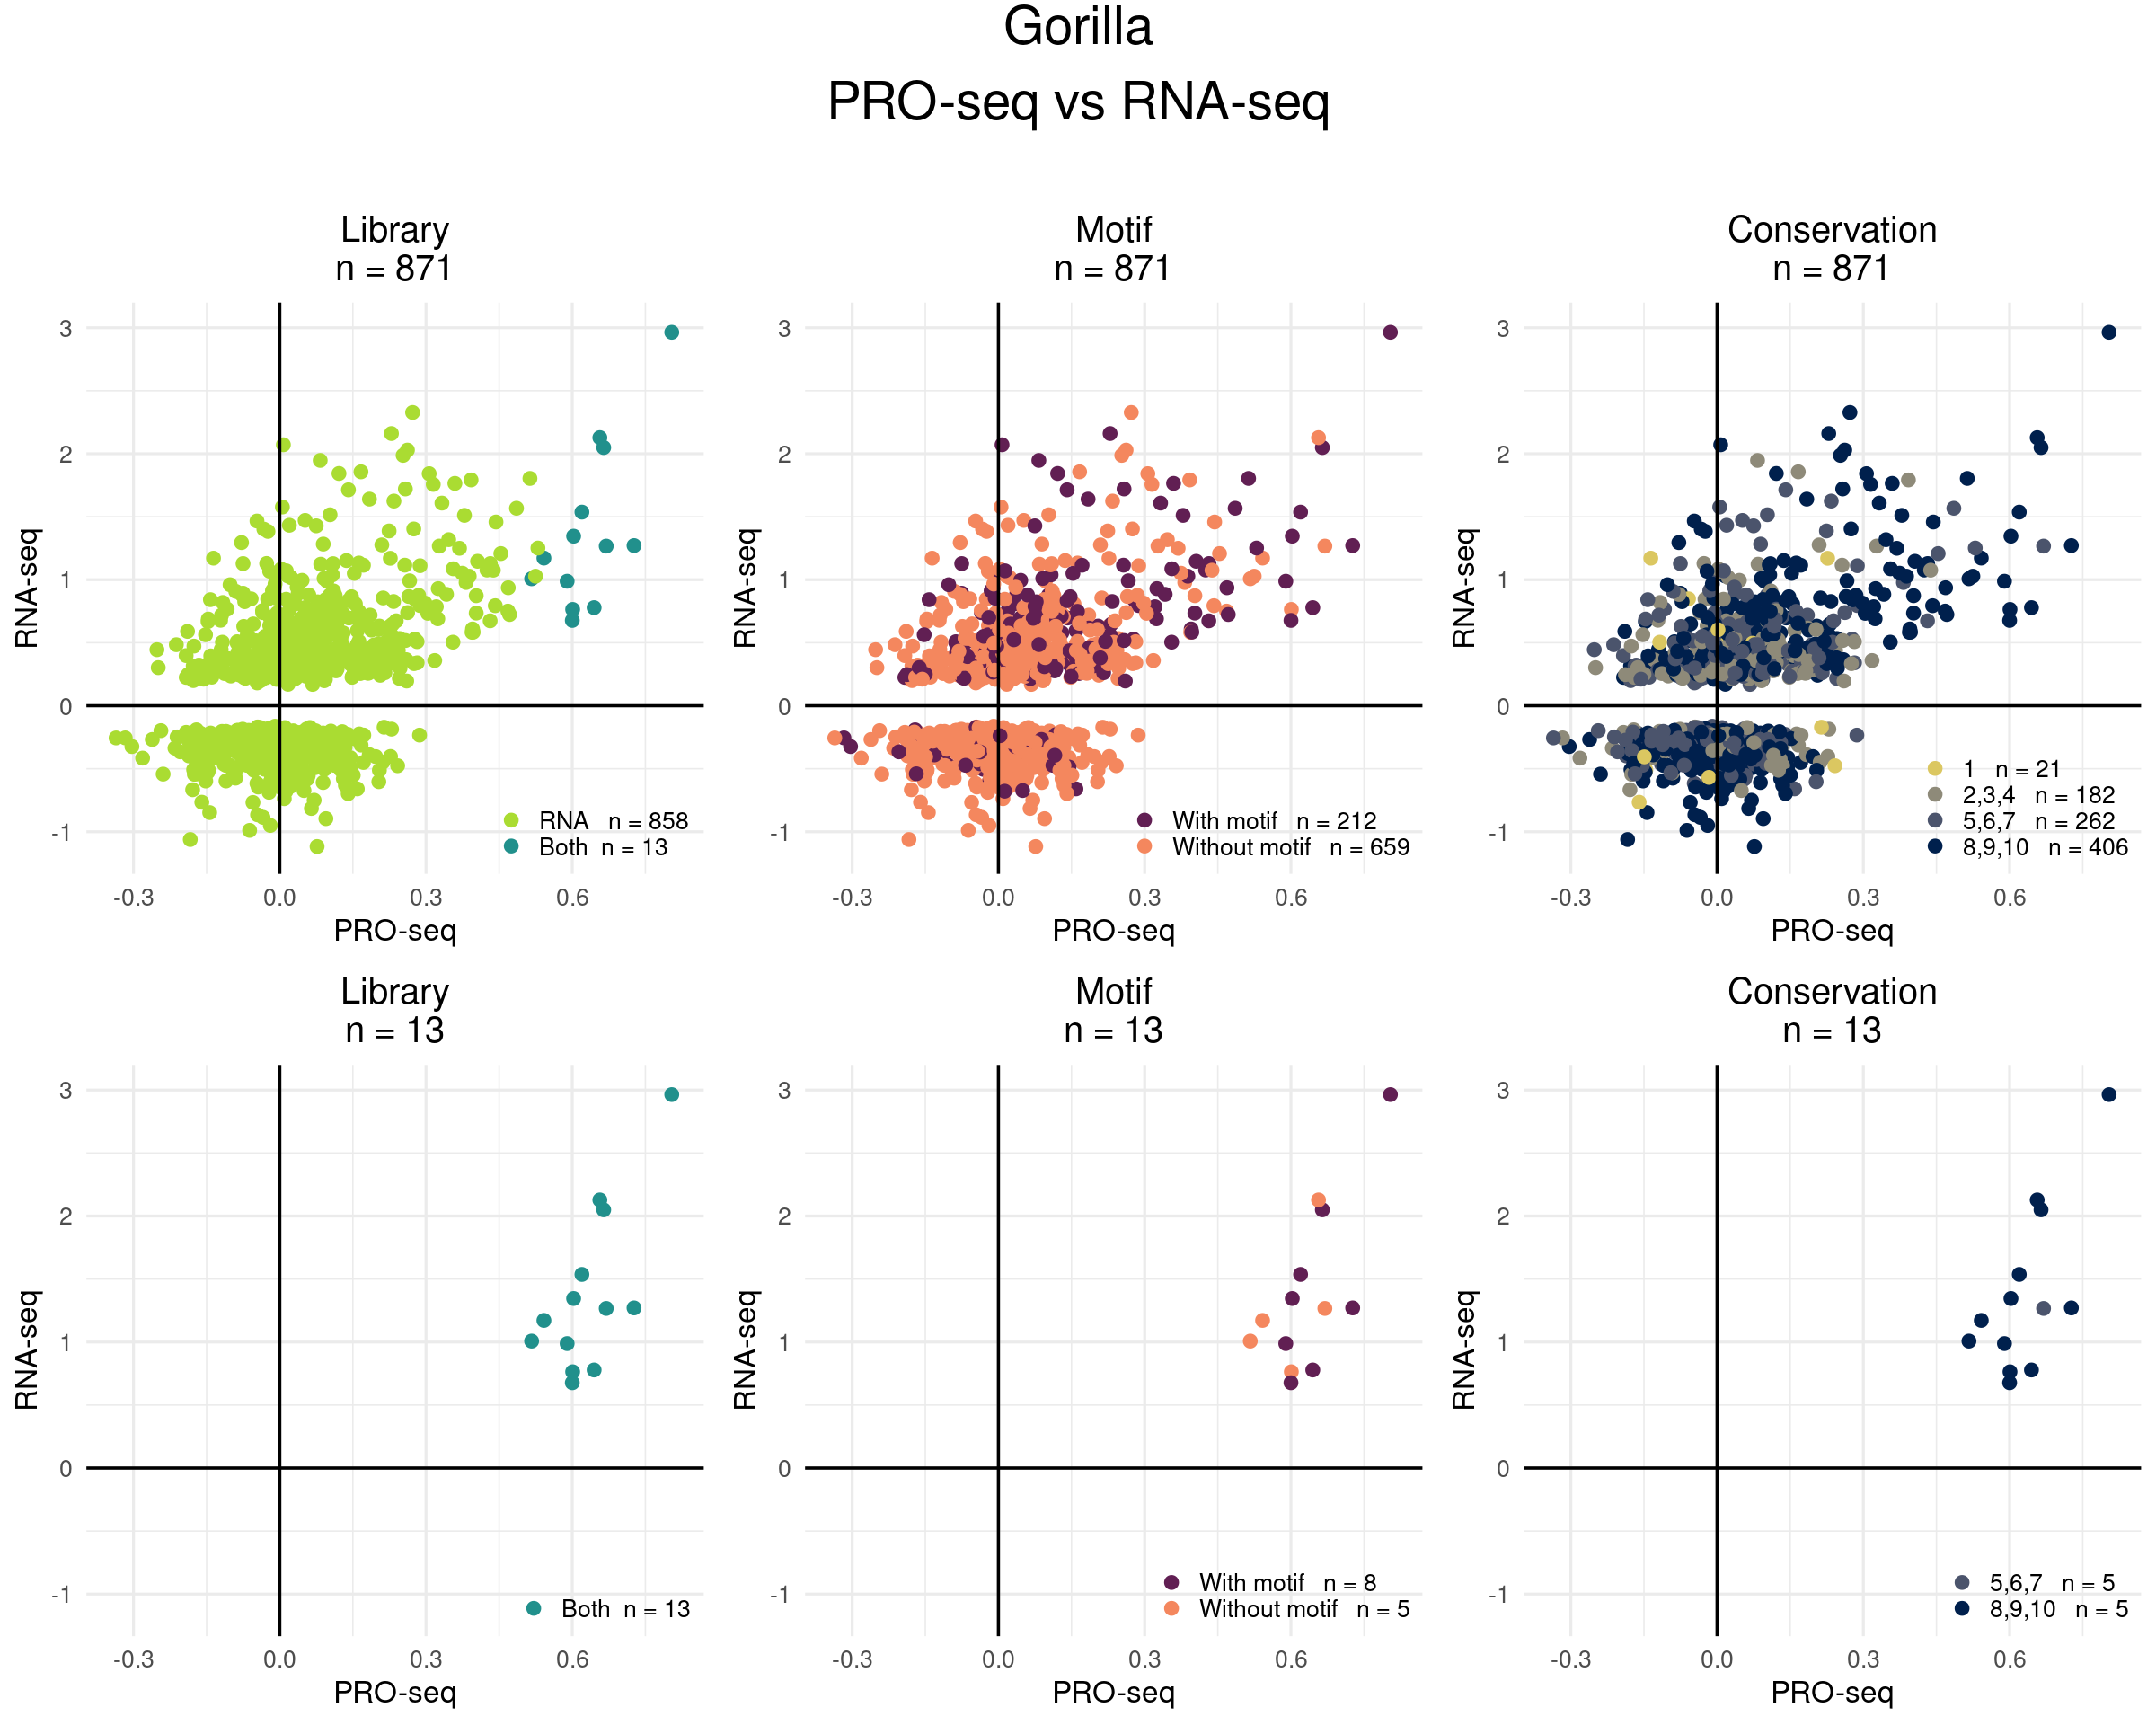

In [15]:
RNAvsPROscatterplot("Gorilla")

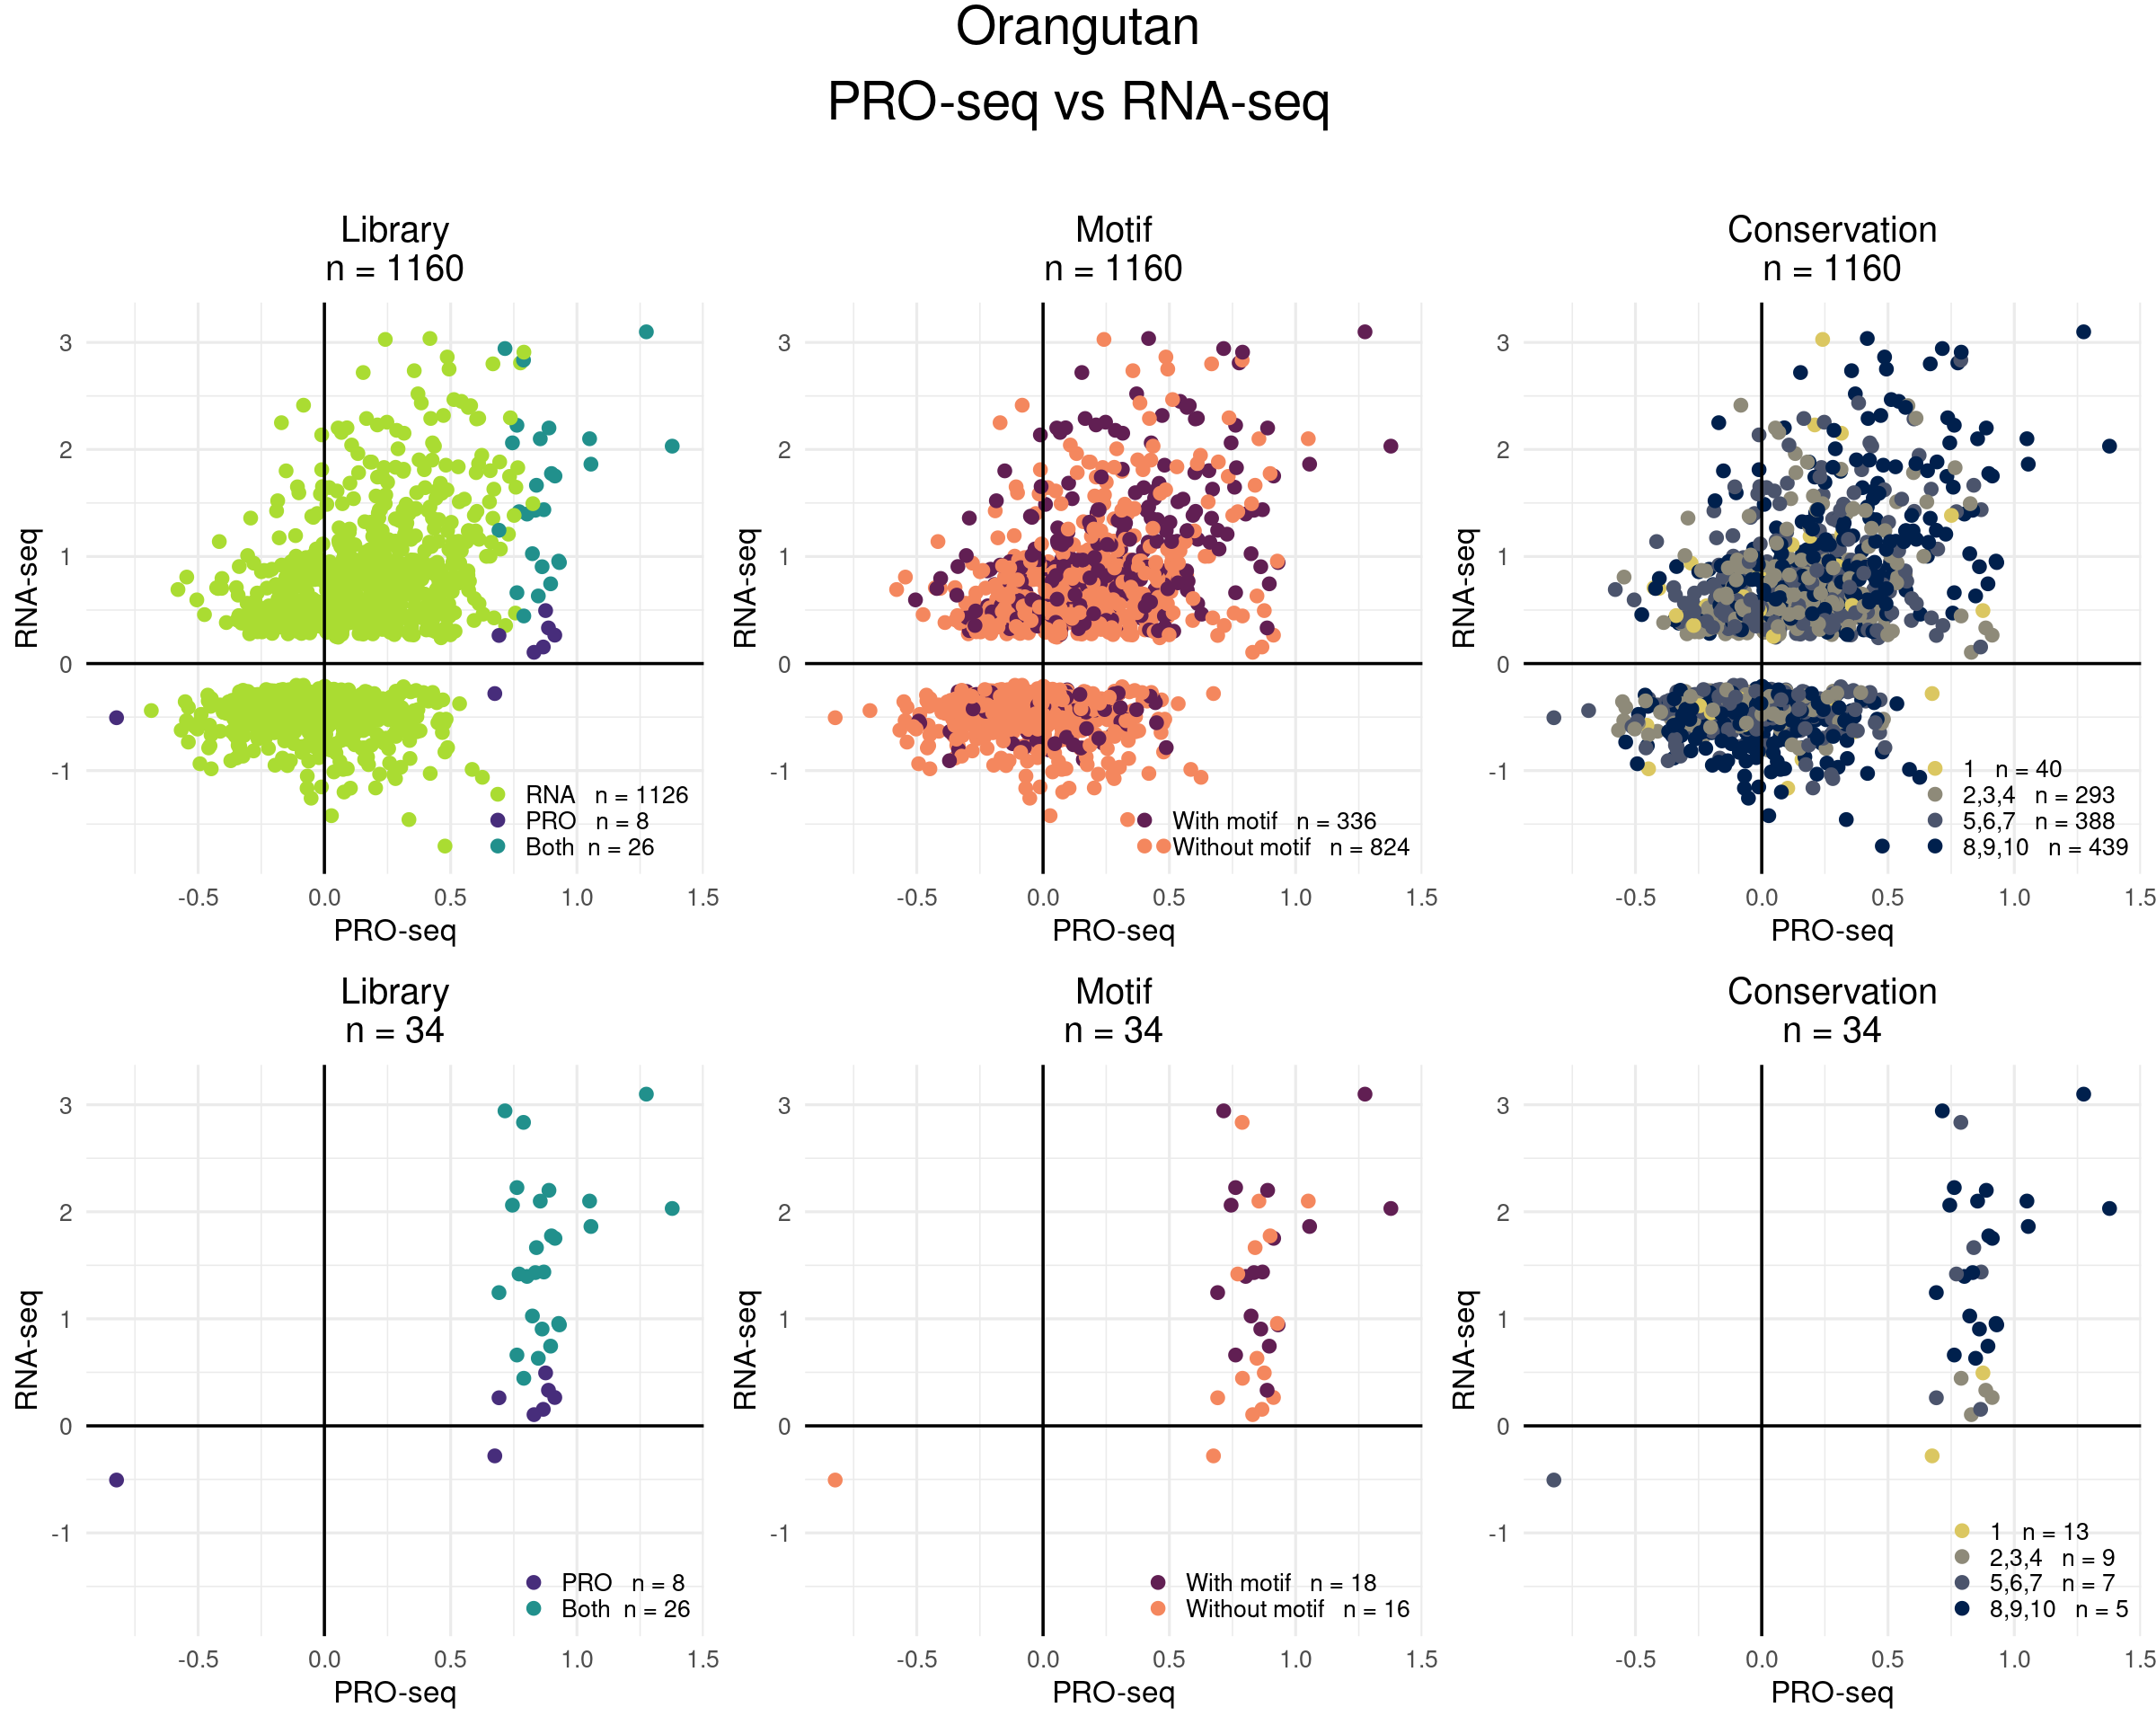

In [16]:
RNAvsPROscatterplot("Orangutan")

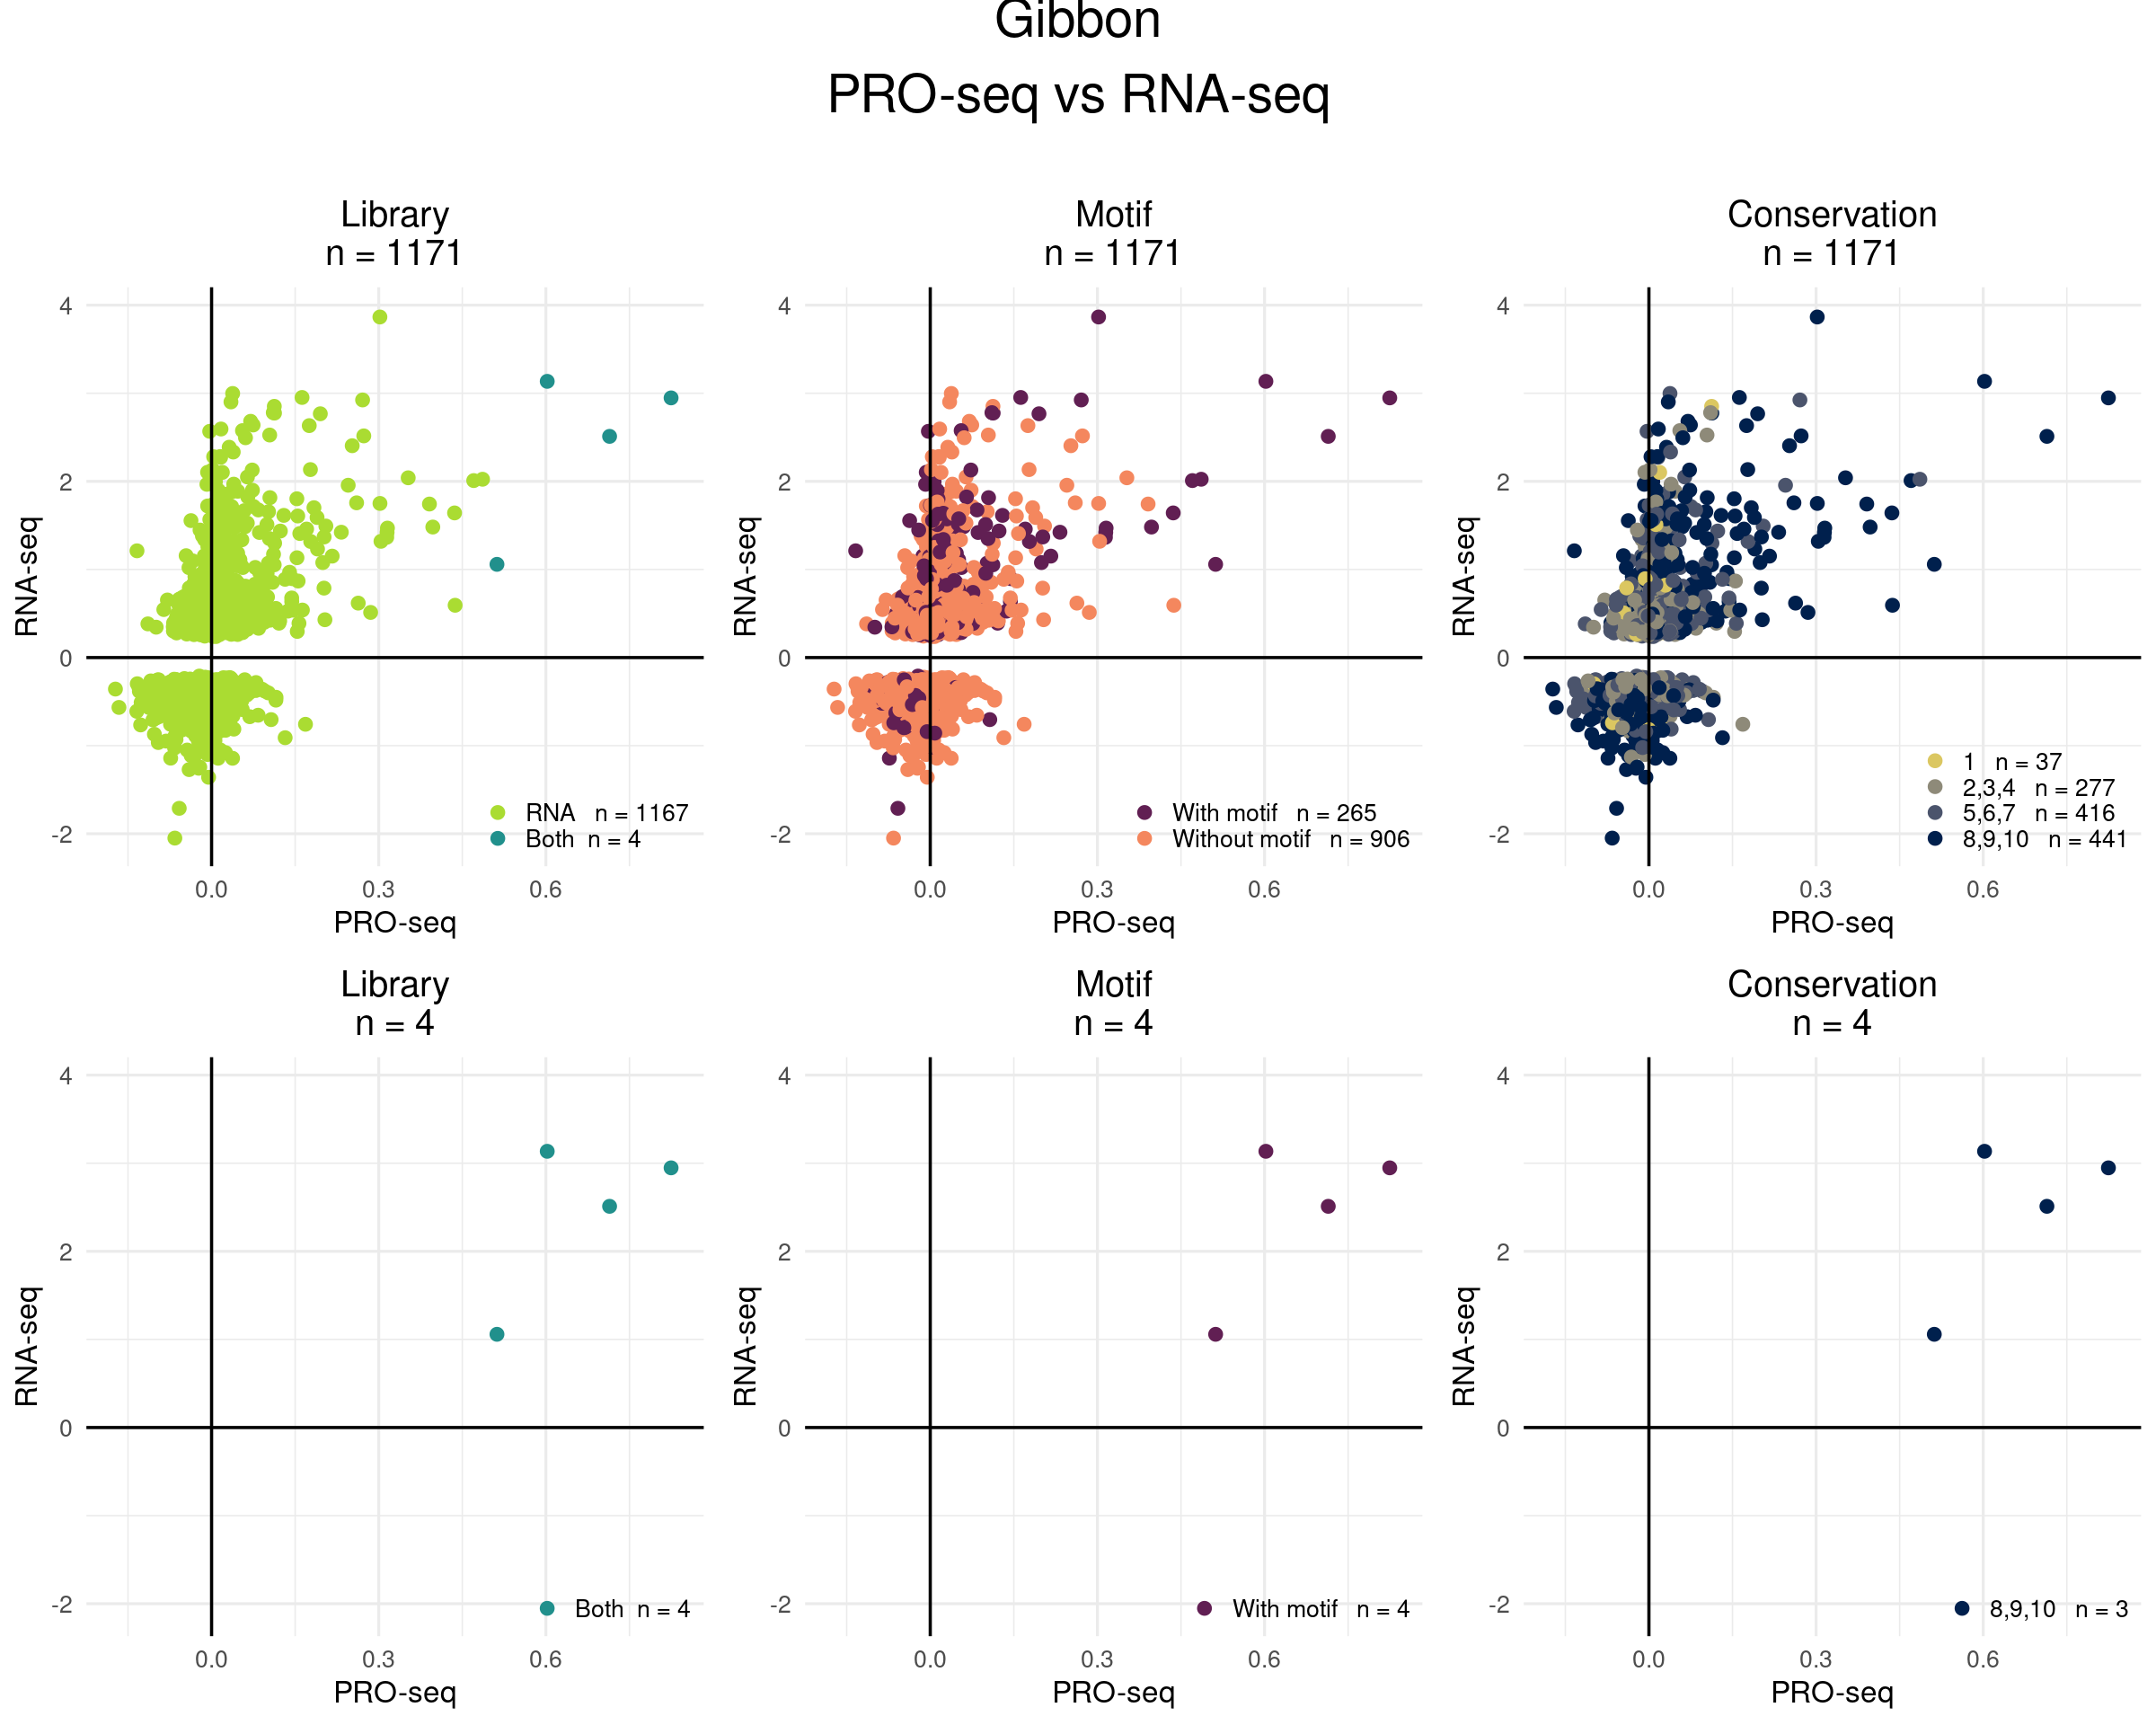

In [17]:
RNAvsPROscatterplot("Gibbon")

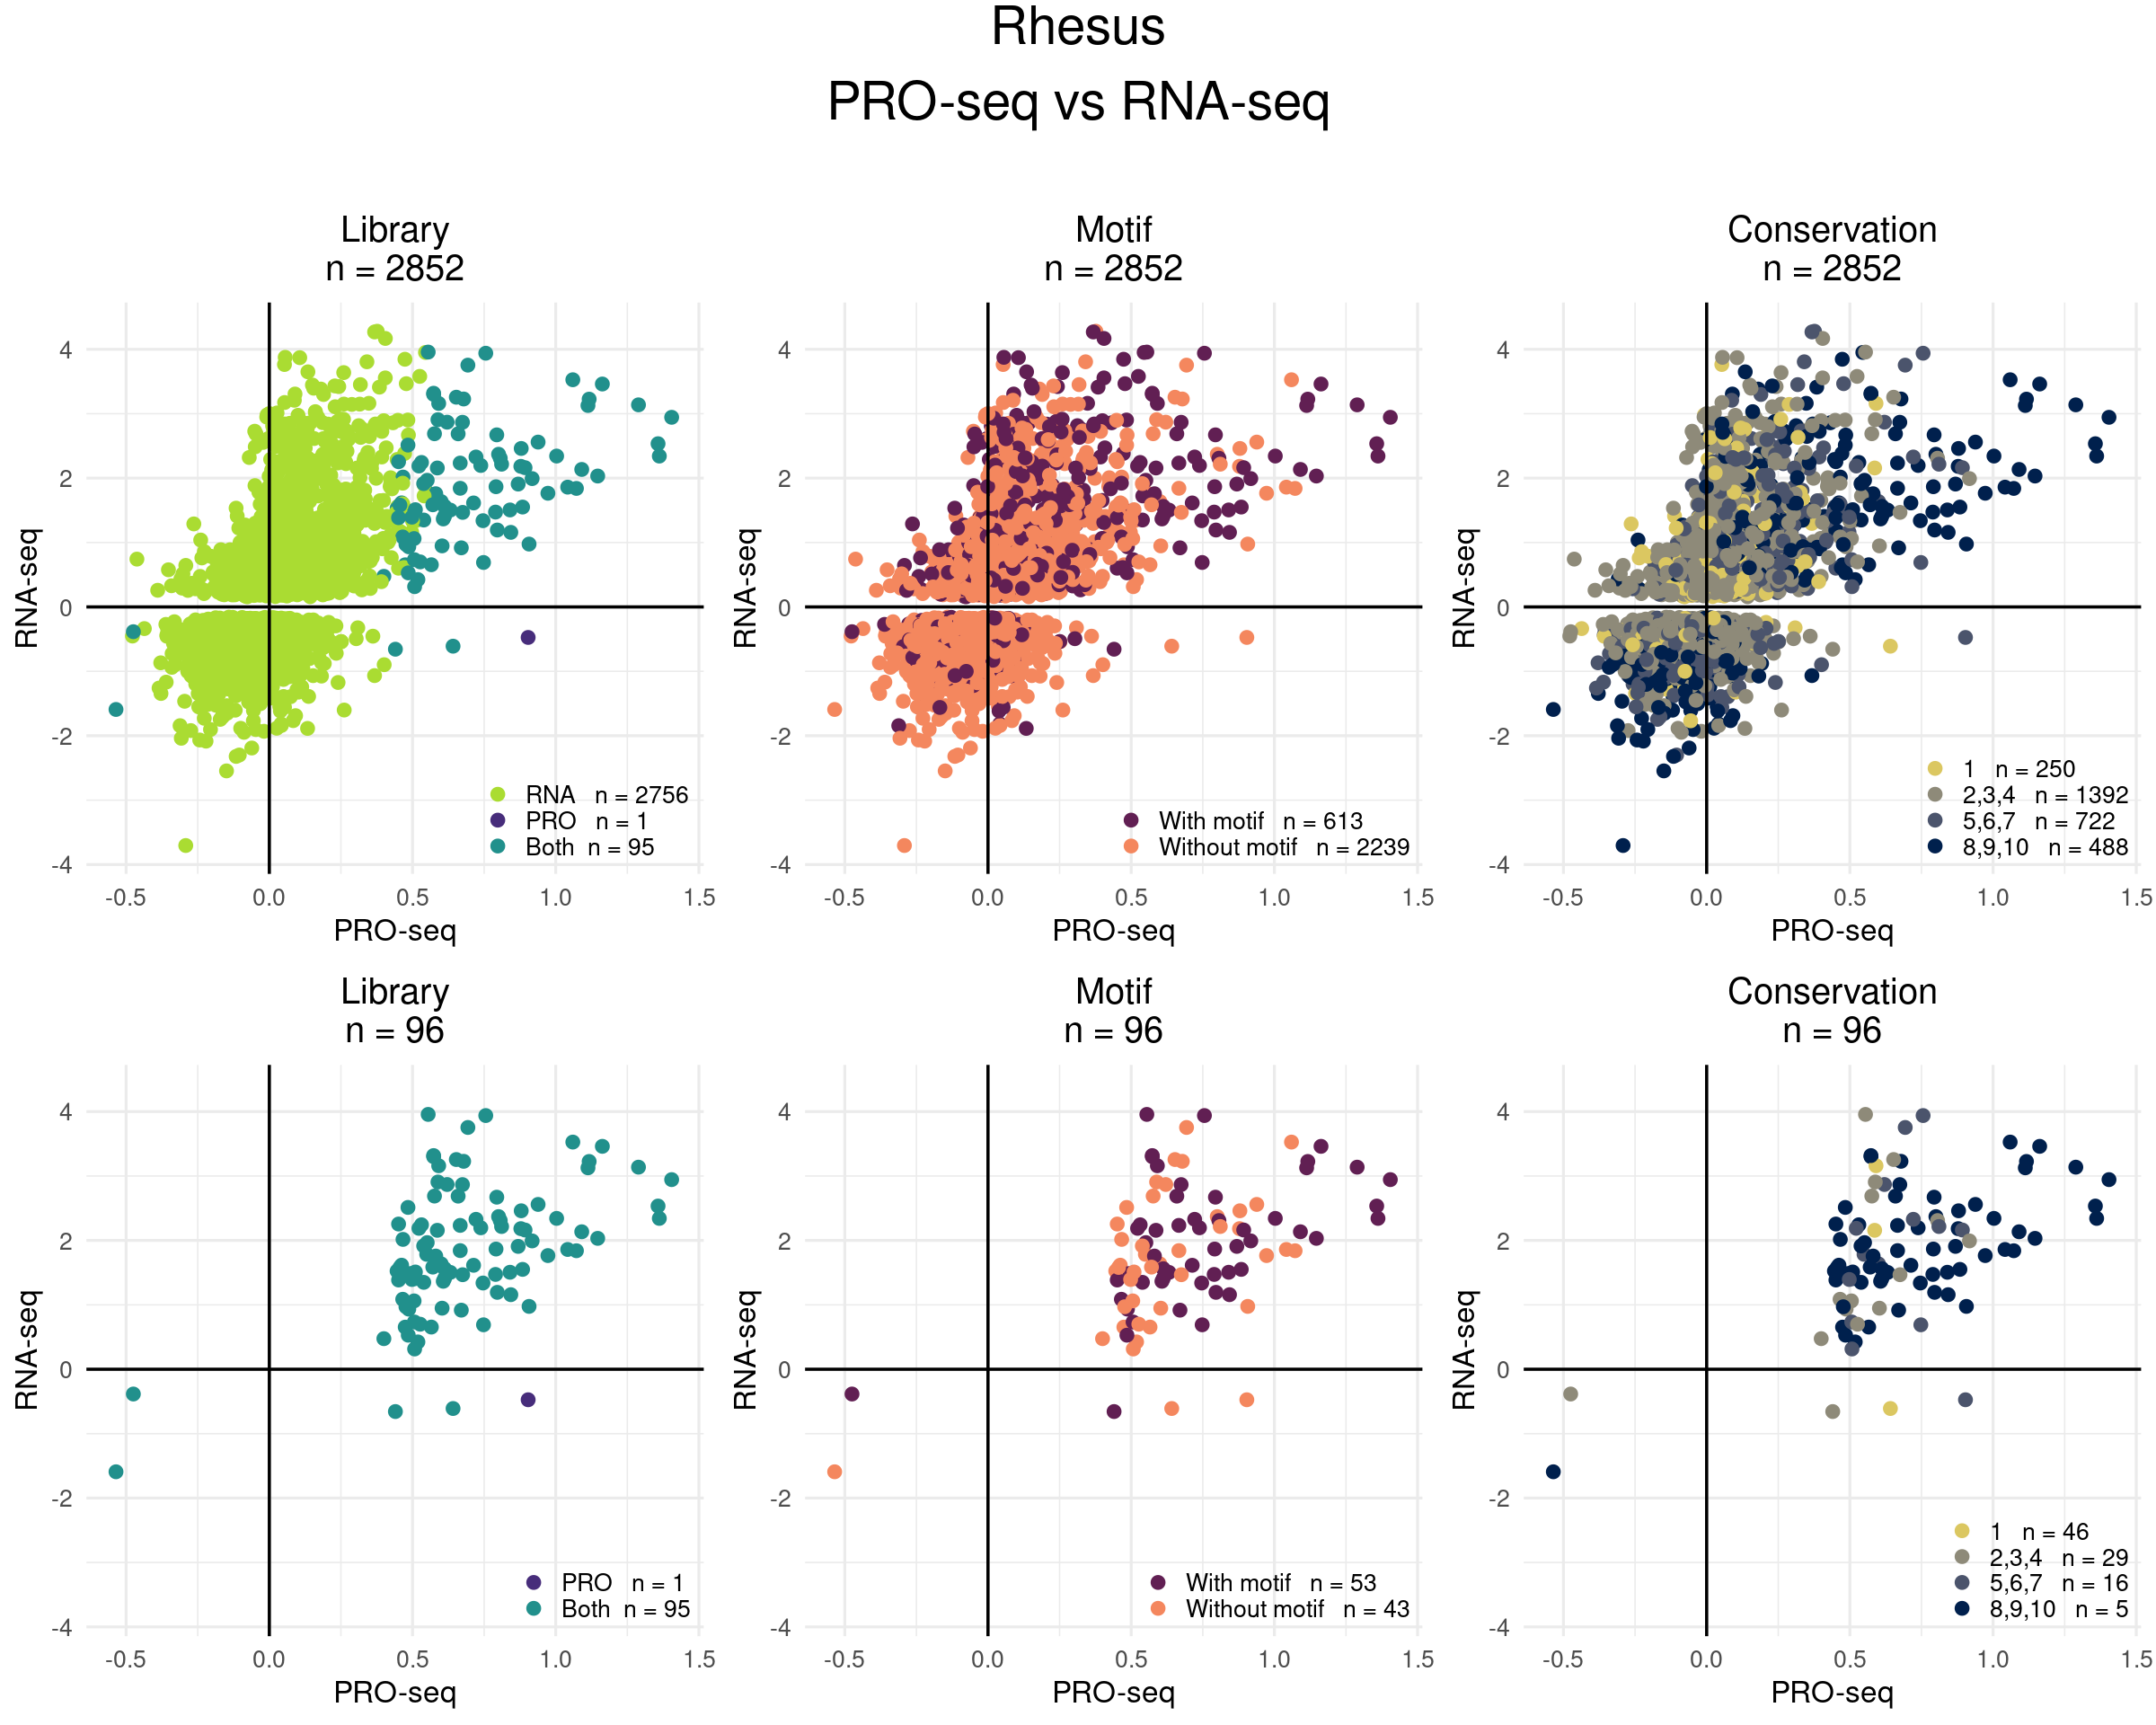

In [18]:
RNAvsPROscatterplot("Rhesus")

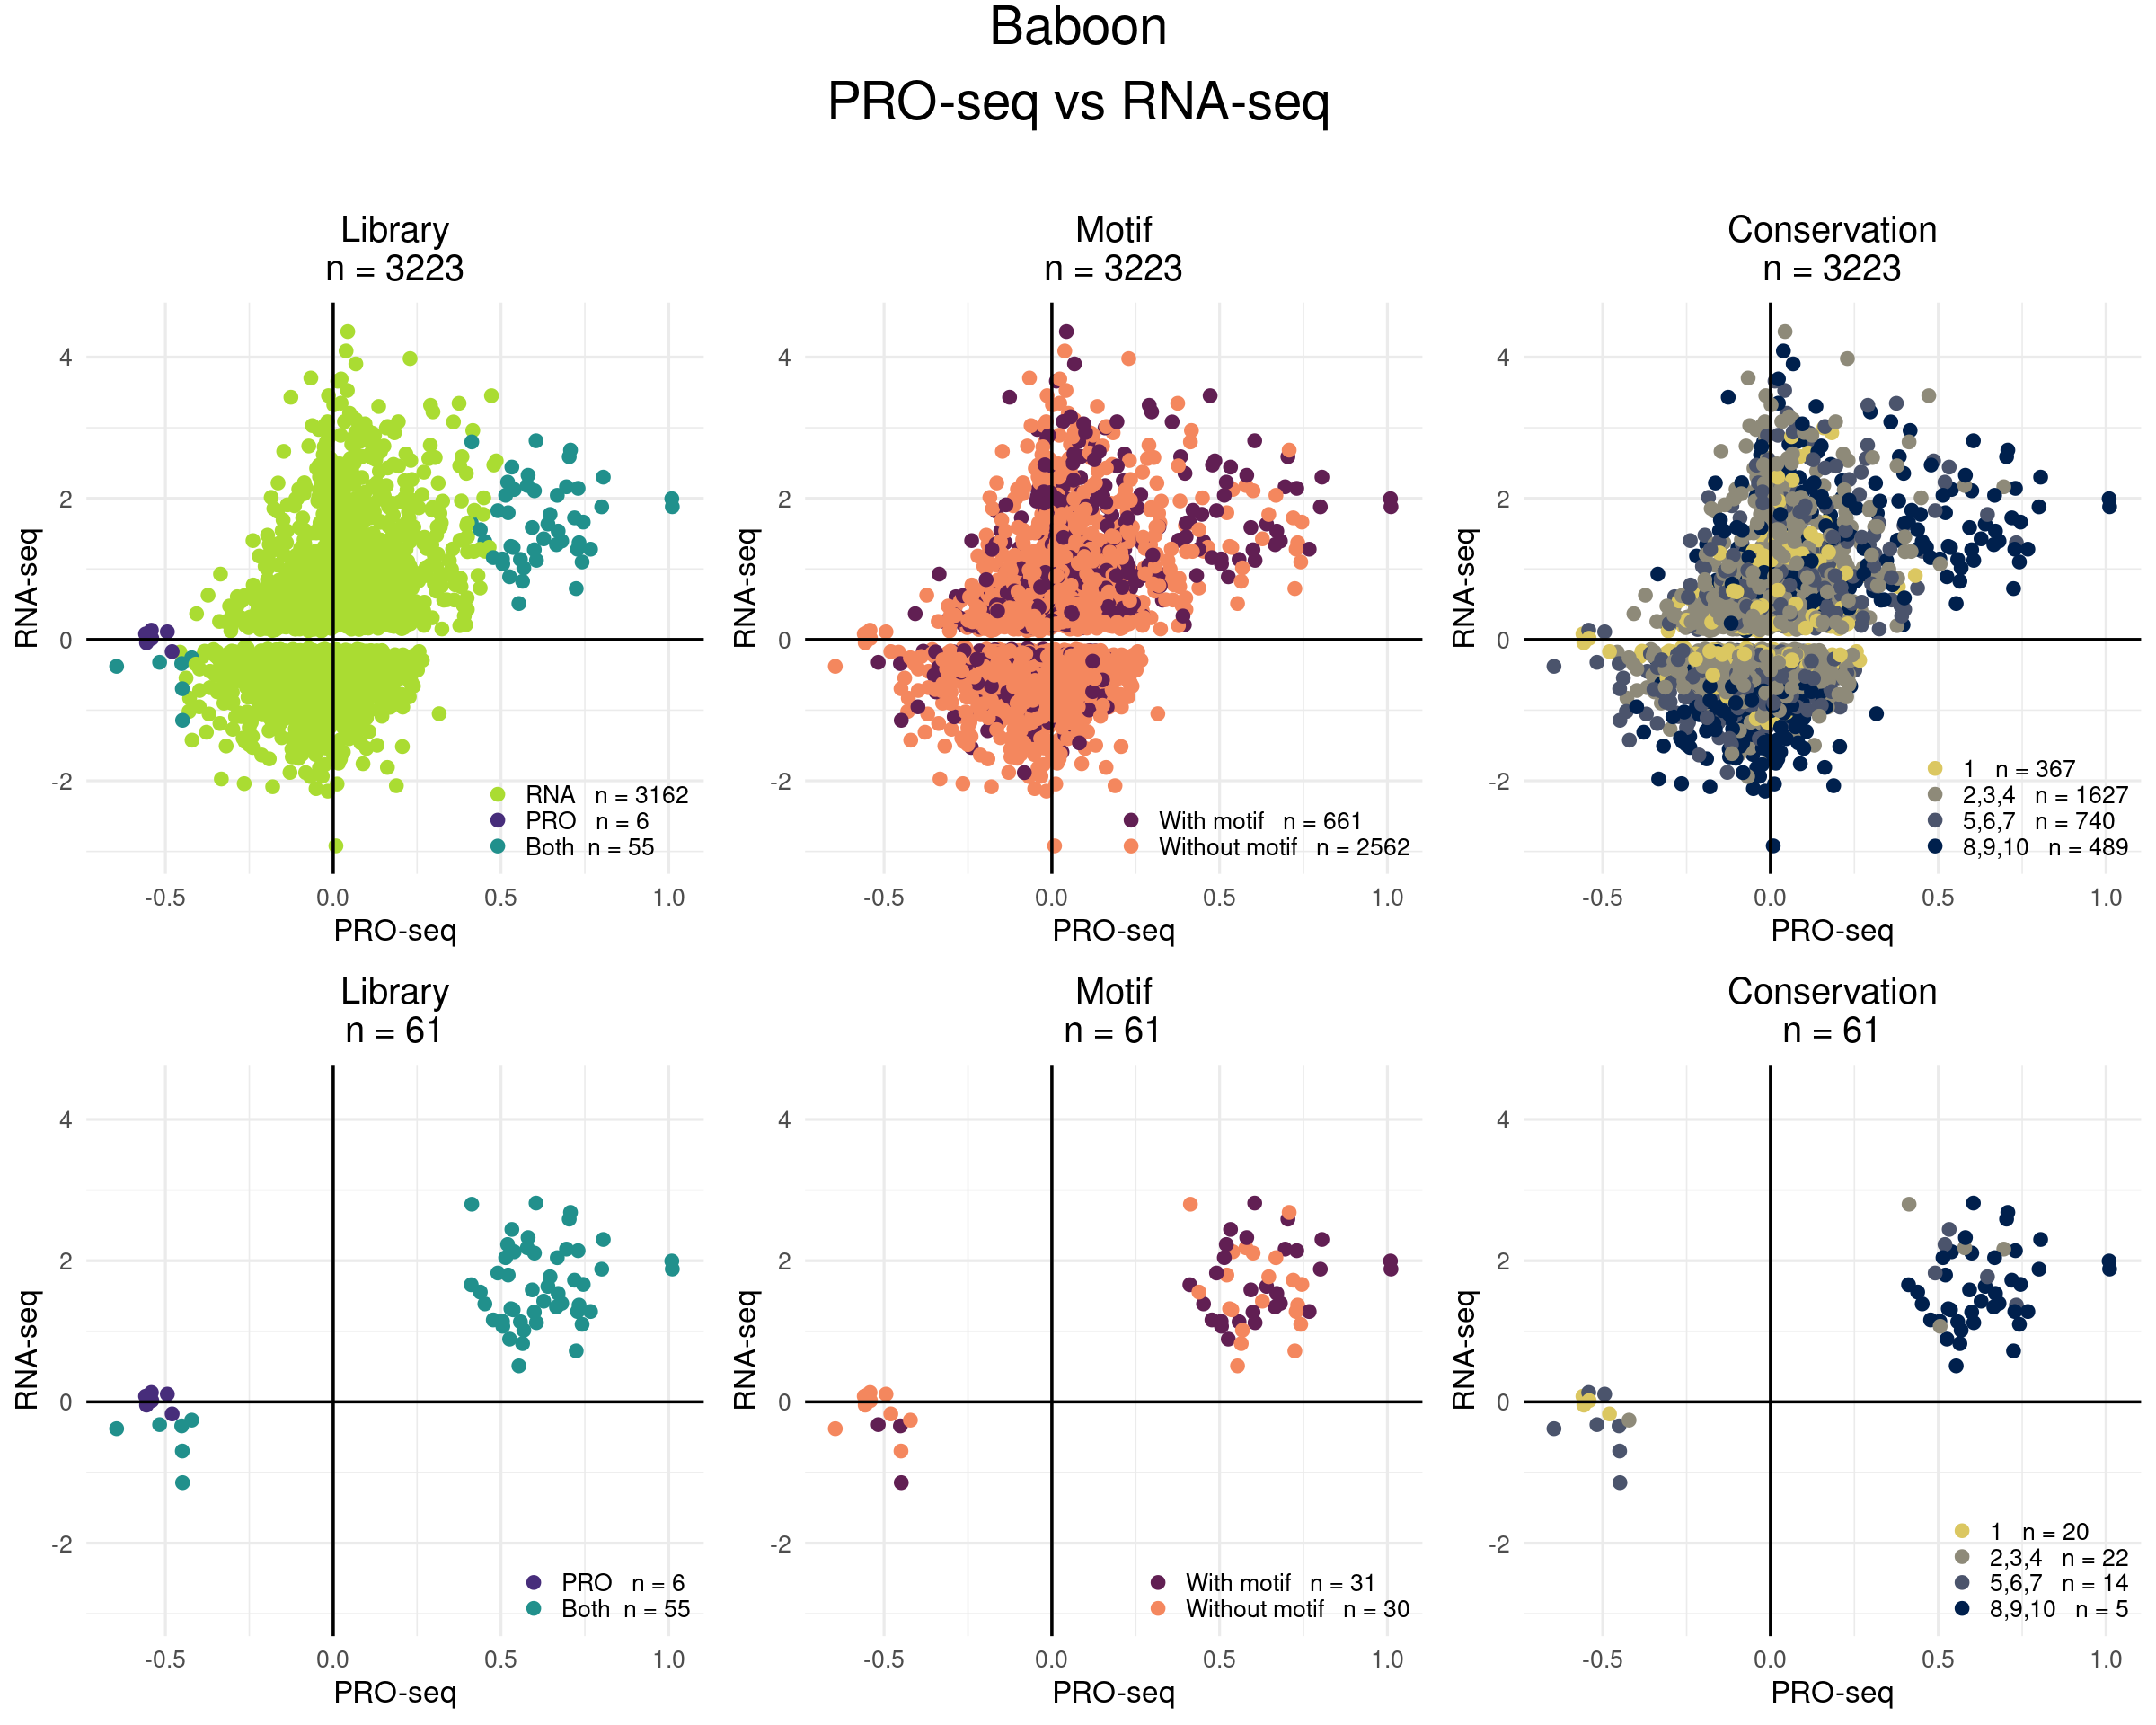

In [19]:
RNAvsPROscatterplot("Baboon")

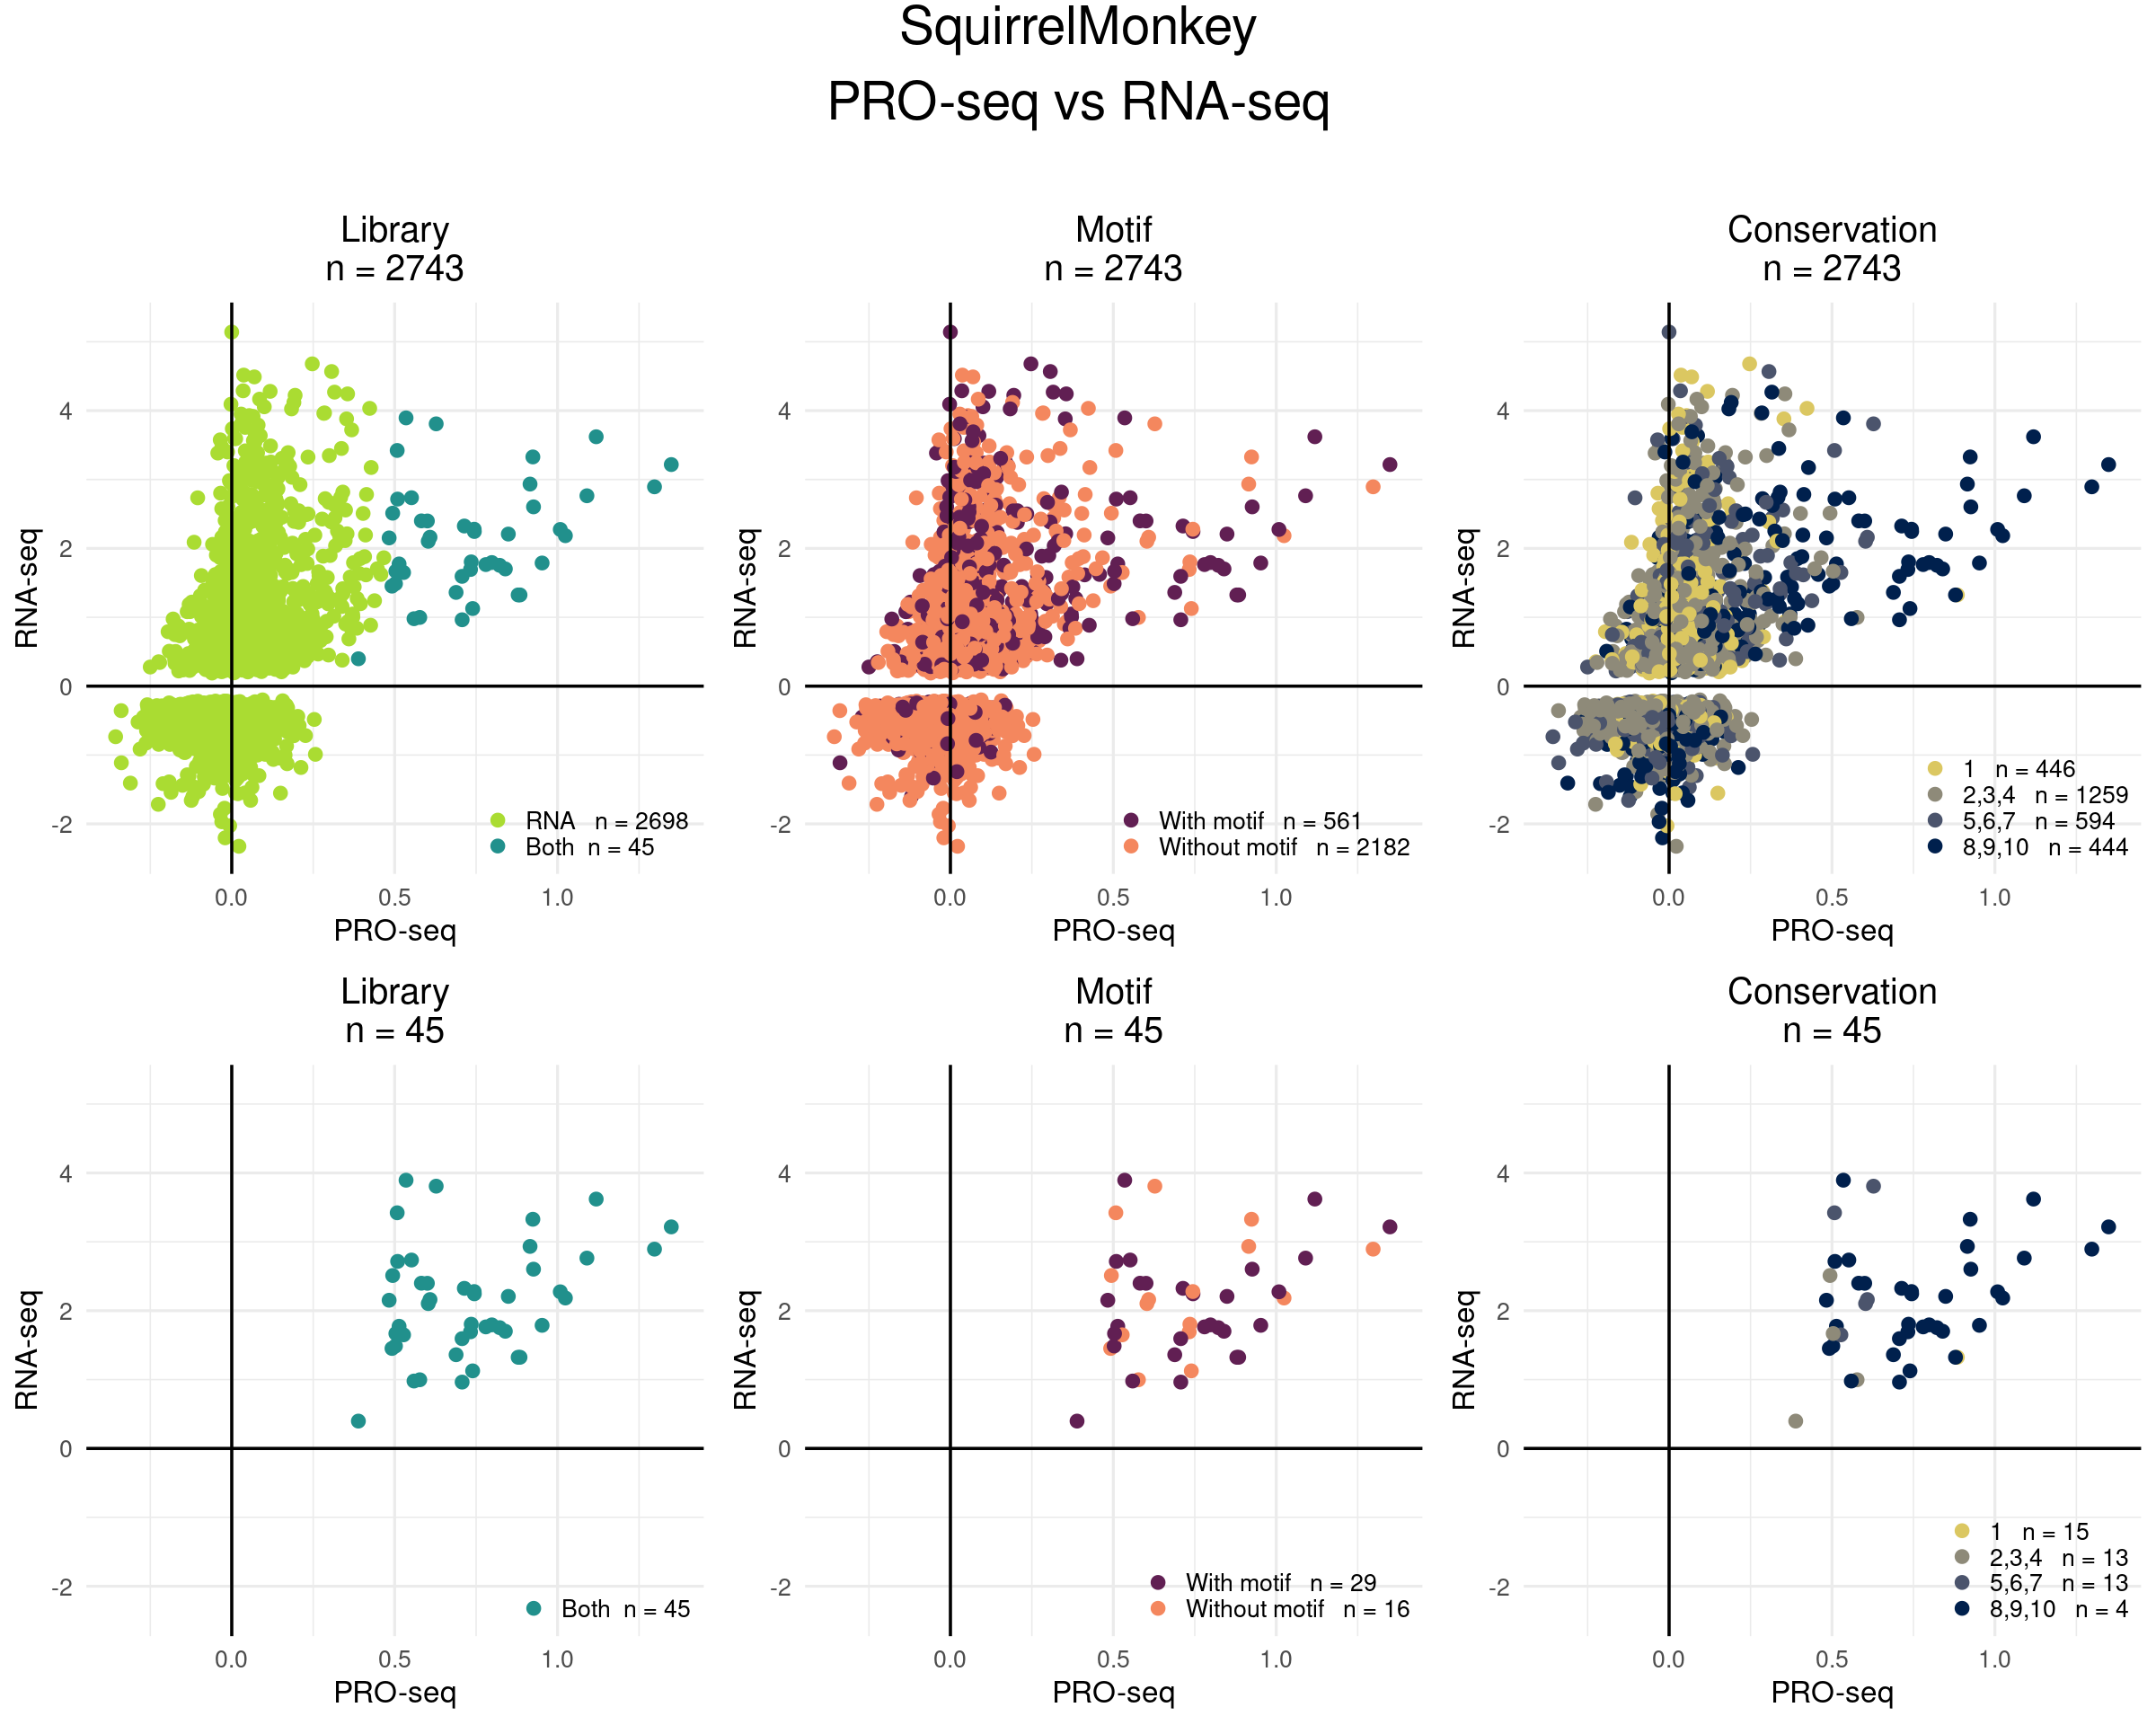

In [20]:
RNAvsPROscatterplot("SquirrelMonkey")

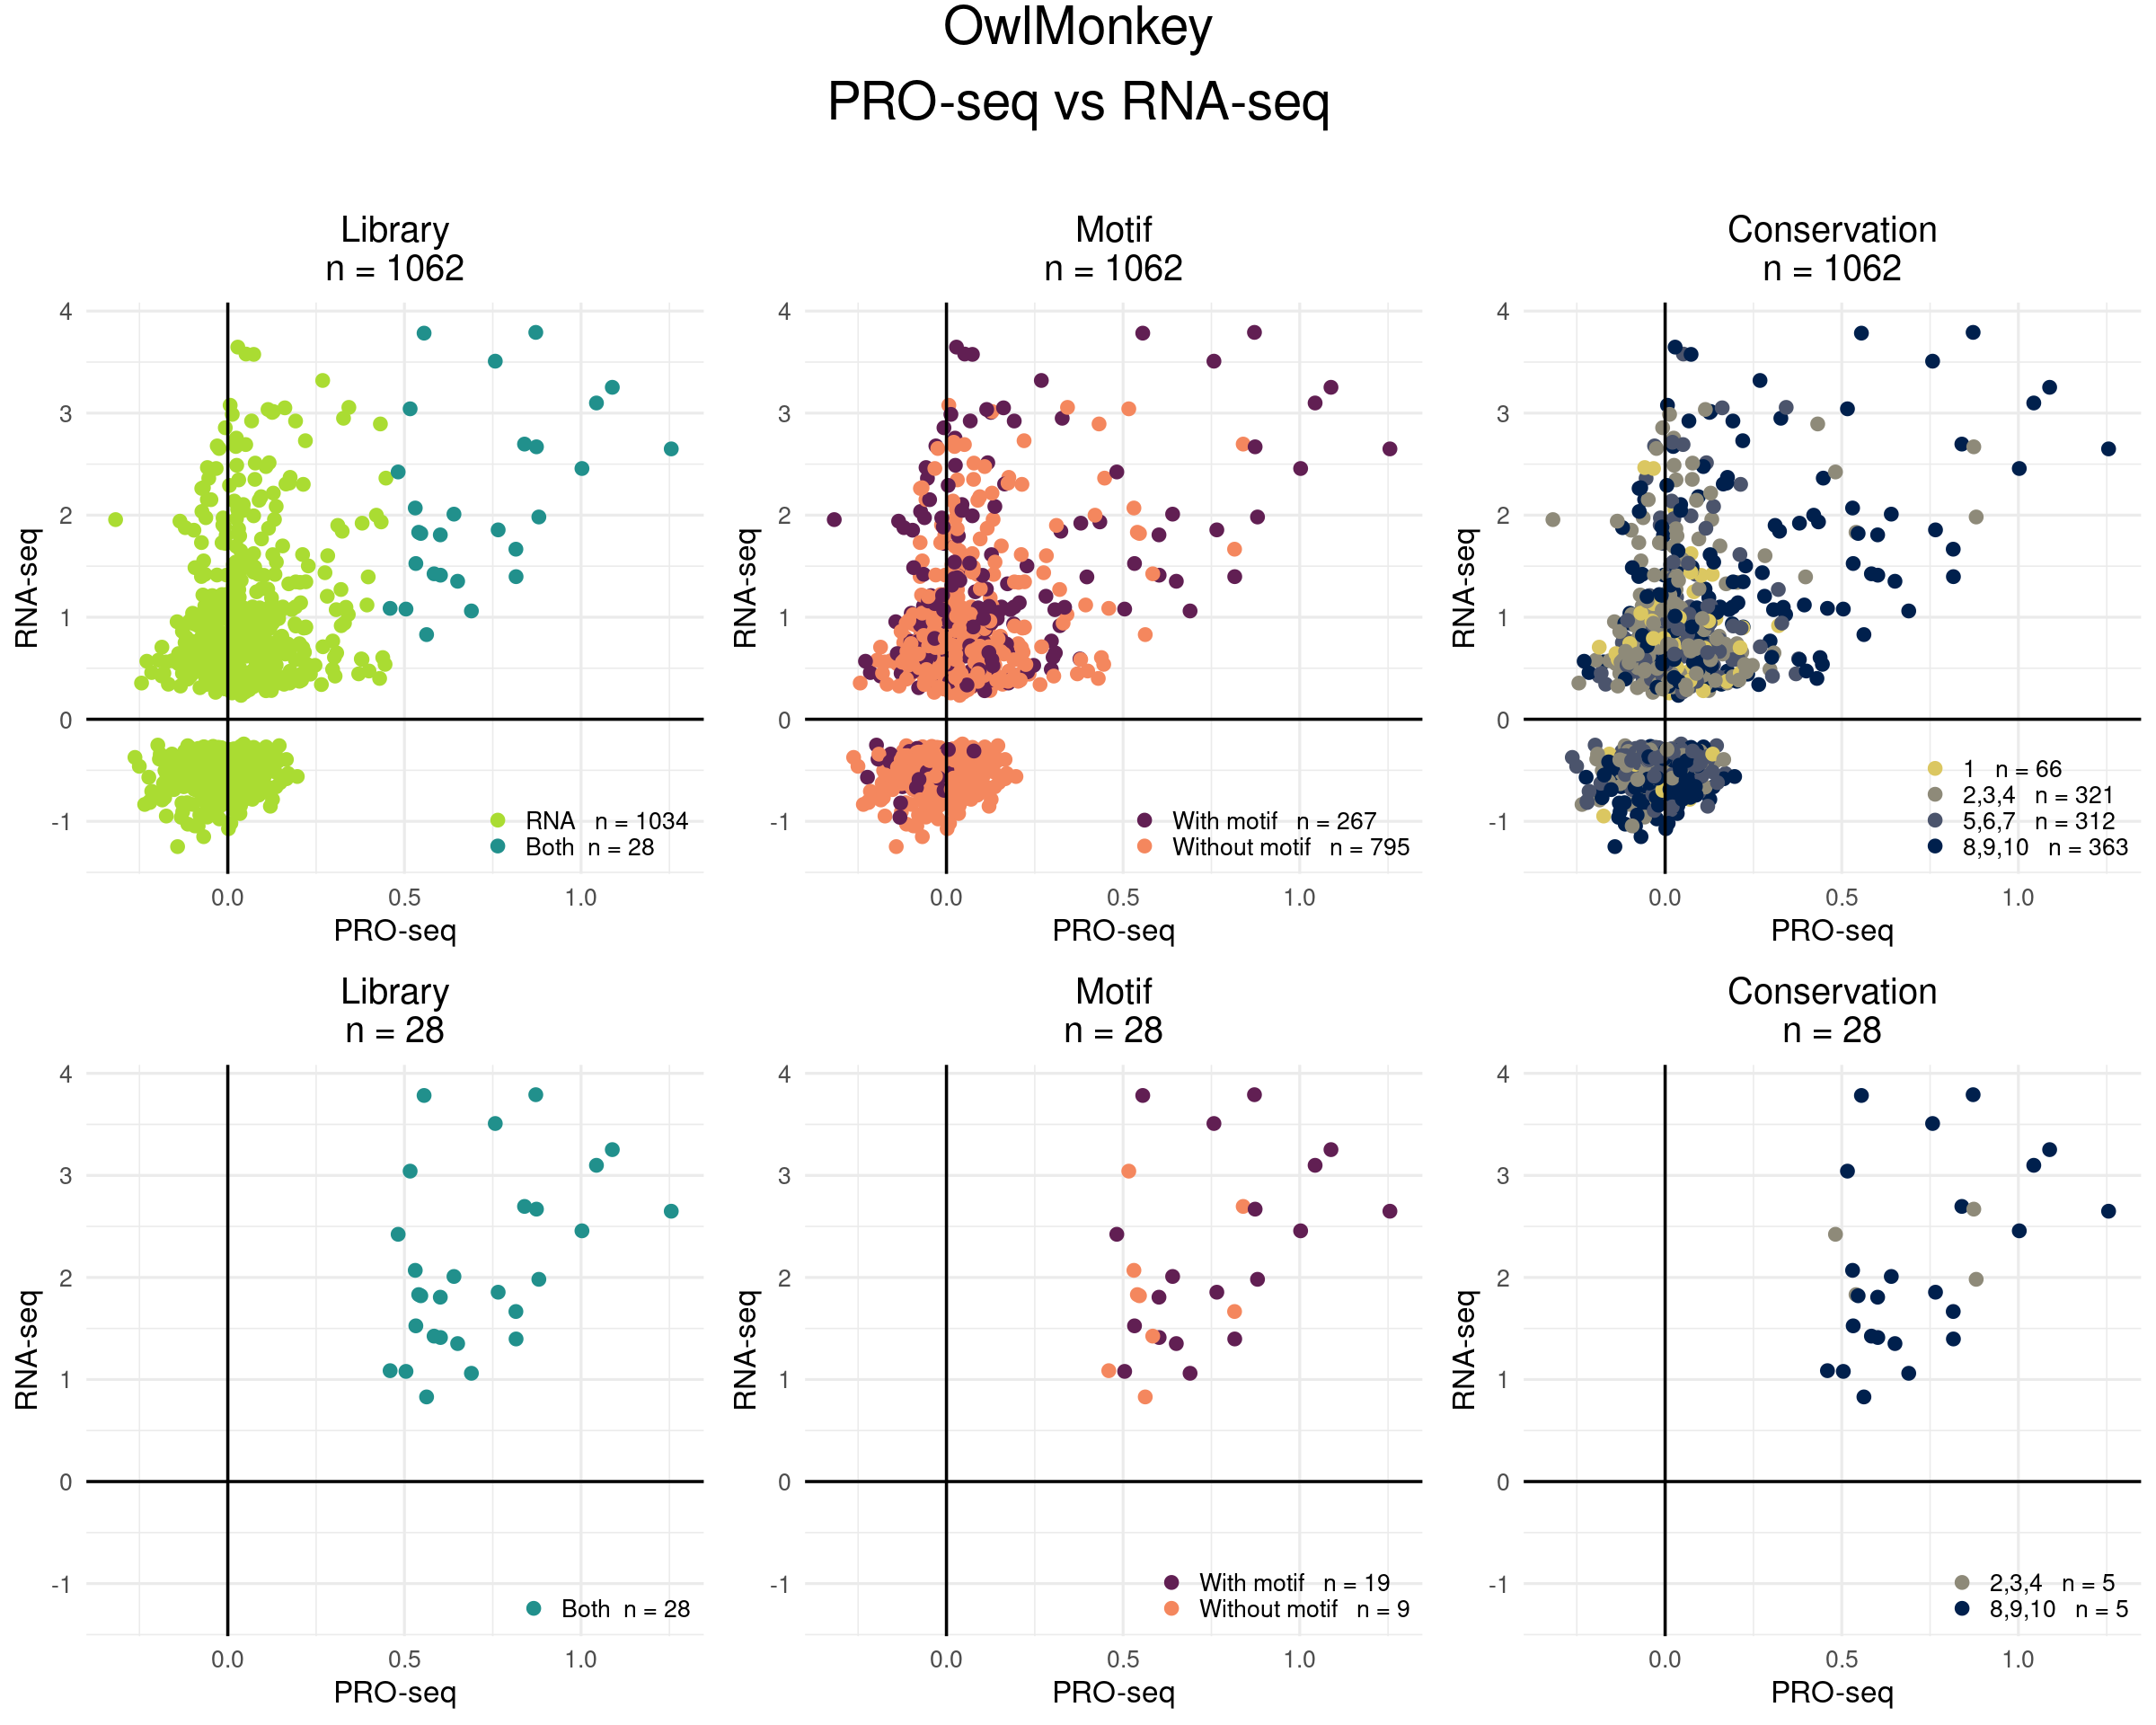

In [21]:
RNAvsPROscatterplot("OwlMonkey")